In [1]:
import sys

full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
sys.path.append(full_path_to_modul_dir)

from mcbj import *
import plots  # complex plot layouts
import filter_traces  # to filter traces

In [119]:
def hist_1d_demo(hist: Histogram,
                 traces: Union[int, list, np.array, Tuple[int, ...]],
                 how='random', shift = 1, shift_0=0,
                 figsize=utils.cm2inch(7, 4), dpi=200,
                 hist_style: str = 'area', cmap='Blues', my_label=None,
                 axes: Optional[Tuple[matplotlib.axes.Axes, matplotlib.axes.Axes, matplotlib.axes.Axes, matplotlib.axes.Axes]]= None, fig = None):
                 # add_par_axis = False):
      
    if isinstance(traces, int):
        if how=='random':
            traces = np.random.choice(hist.traces, traces)      
        elif how=='equal':
            tot_num = hist.traces.shape[0]
            traces = np.linspace(0, tot_num-1, 10, endpoint=True, dtype=int)
        print(f'Plotted traces: {traces}')
    
    selected_colors = colormaps[cmap](np.linspace(0.5, 0.8, len(traces)))
    
    # load each tracepair
    trace_pairs_loaded = [TracePair(i, load_from=hist.folder) for i in traces]
    # align each tarce at 0.5 G0
    for i in range(len(trace_pairs_loaded)):
        trace_pairs_loaded[i].align_trace(align_at=0.5)
    
    if axes is None:
        fig = plt.figure(figsize=figsize, dpi=dpi)
        gs = plt.GridSpec(1, 2, figure=fig,
                          left=0.1, right=0.9, top=0.9, bottom=0.1, width_ratios=(5, 3),
                          hspace=0, wspace=0.2)
        
        gs_singles = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, width_ratios=(3, 2),
                                                      subplot_spec=gs[0],
                                                      wspace=0, hspace=0)
        
        gs_totals = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, width_ratios=(2, 1),
                                                     subplot_spec=gs[1],
                                                     wspace=0.1, hspace=0)
        
        ax_traces = fig.add_subplot(gs_singles[0])
        ax_singles = fig.add_subplot(gs_singles[1])
        ax_hist_bot = fig.add_subplot(gs_totals[0])
        ax_hist_top = fig.add_subplot(gs_totals[1])
    else:
        if len(axes) != 4:
            raise ValueError(f'Len of axes not okay, got {len(axes)} instead of 4.')
        
        ax_traces = axes[0]
        ax_singles = axes[1]
        ax_hist_bot = axes[2]
        ax_hist_top = axes[3]

    ax_hist_top.yaxis.tick_right()
    ax_hist_top.yaxis.set_label_position('right')

    for ax in (ax_traces, ax_singles, ax_hist_bot, ax_hist_top):
        ax.set_ylim(10**np.round(min(np.log10(hist.hist_1d_bins))), 10**np.round(max(np.log10(hist.hist_1d_bins))))

    ax_traces.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False,
                          labeltop=True, labelbottom=True)

    ax_singles.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=False, labelright=False,
                           labeltop=True, labelbottom=True)

#     ax_hist_bot.tick_params(which='both', left=True, right=False, top=True, bottom=True, labelleft=False, labelright=False,
#                             labeltop=True, labelbottom=True)
    
#     ax_hist_top.tick_params(which='both', left=False, right=True, top=True, bottom=True, labelleft=False, labelright=True,
#                             labeltop=True, labelbottom=True)
    
    ax_hist_bot.spines[['right']].set_visible(False)
    ax_hist_top.spines[['left']].set_visible(False)

    for i, trace in enumerate(traces):
        ax_traces.plot(trace_pairs_loaded[i].aligned_piezo_pull+ i*shift + shift_0, trace_pairs_loaded[i].conductance_pull, lw=0.5, c=selected_colors[i], label=my_label, zorder=-1)
        # ax_singles.barh(hist.hist_1d_bins[:-1], width=hist.temporal_hist_pull[np.where(hist.traces == trace)[0][0]][:-1]/hist.traces.shape[0], height=np.diff(hist.hist_1d_bins), alpha=0.6)
        ax_singles.barh(hist.hist_1d_bins[:-1], width=hist.temporal_hist_pull[np.where(hist.traces == trace)[0][0]][:-1], height=np.diff(hist.hist_1d_bins), alpha=0.6, color=selected_colors[i])
    
    if hist_style == 'area':
        ax_hist_bot.fill_betweenx(hist.hist_1d_bins, hist.hist_1d_pull, lw=0.5, alpha=0.5, color=selected_colors[-1], label=my_label)
        ax_hist_top.fill_betweenx(hist.hist_1d_bins, hist.hist_1d_pull, lw=0.5, alpha=0.5, color=selected_colors[-1], label=my_label)
    elif hist_style == 'line':
        ax_hist_bot.plot(hist.hist_1d_pull, hist.hist_1d_bins, lw=0.7, c=selected_colors[-1], label=my_label)
        ax_hist_top.plot(hist.hist_1d_pull, hist.hist_1d_bins, lw=0.7, c=selected_colors[-1], label=my_label)
    ax_hist_bot.set_xlim(0, 50)
    ax_hist_top.set_xlim(50, 600)

    ax_traces.set_xlim(-1)
    
    if my_label is not None:
        ax_traces.legend(fontsize=6, frameon=False, loc='upper right', bbox_to_anchor=(0.99, 0.75), handlelength=0.75)
        ax_hist_top.legend(fontsize=6, frameon=False, loc='upper right', bbox_to_anchor=(0.99, 0.75), handlelength=0.75)
    
#     if add_par_axis == 'add':
#         par_ax_hist_bot = ax_hist_bot.twiny()
#         par_ax_hist_top = ax_hist_top.twiny()
#         return ax_traces, ax_singles, ax_hist_bot, ax_hist_top, par_ax_hist_bot, par_ax_hist_top
    
#     if add_par_axis=='use':
#         return ax_traces, ax_singles, ax_hist_bot, ax_hist_top, ax_hist_bot, ax_hist_top
    
    return fig, ax_traces, ax_singles, ax_hist_bot, ax_hist_top

# 2023.08.15.

In [6]:
date = "23_08_15"
# home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')
home_folder = Path(f"D:/BJ_Data/{date}")

## Example traces

In [247]:
trace_pair = TracePair(74, load_from=home_folder)

(1e-05, 40)

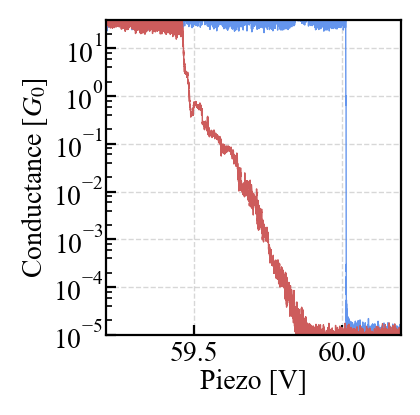

In [268]:
trace_pair = TracePair(7, load_from=home_folder)
ax = trace_pair.plot_trace_pair(dpi=200)
ax.set_xlim(59.2, 60.2)
ax.set_ylim(1e-5, 40)

## Filter traces
Not all push traces started from broken contact, filter those that do.

In [10]:
breaks_pull_1, breaks_push_1 = filter_traces.filter_bj(folder=home_folder, filter_condition=filter_traces.filter_trace_broke,
                                                      start_trace=1, end_trace=424, smaller_than=1e-5)

In [11]:
print(f'Number of selected traces:\n    pull: {breaks_pull_1.shape[0]}, \n    push: {breaks_push_1.shape[0]}.')

Number of selected traces:
    pull: 424, 
    push: 416.


Each array contains the indexes of the selectred traces:

In [12]:
breaks_push_1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

## Histograms

### Clean gold histogram

In [13]:
hist_au_1 = Histogram(folder=home_folder,
                      # start_trace=1, end_trace=424,
                      traces=breaks_push_1,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

Kiszámolja a hisztogramokat, 2D hisztogramokat 0.5 G0-nál összetolva számolja ki.

In [14]:
hist_au_1.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                     interpolate=True,  # use interpolation for the alignment of traces
                     range_pull=(-0.25, 0.25),  # x axis range pull
                     range_push=(-0.5, 1))

  0%|          | 0/416 [00:00<?, ?it/s]

Pull 2D histogram created from 416 traces
Push 2D histogram created from 416 traces


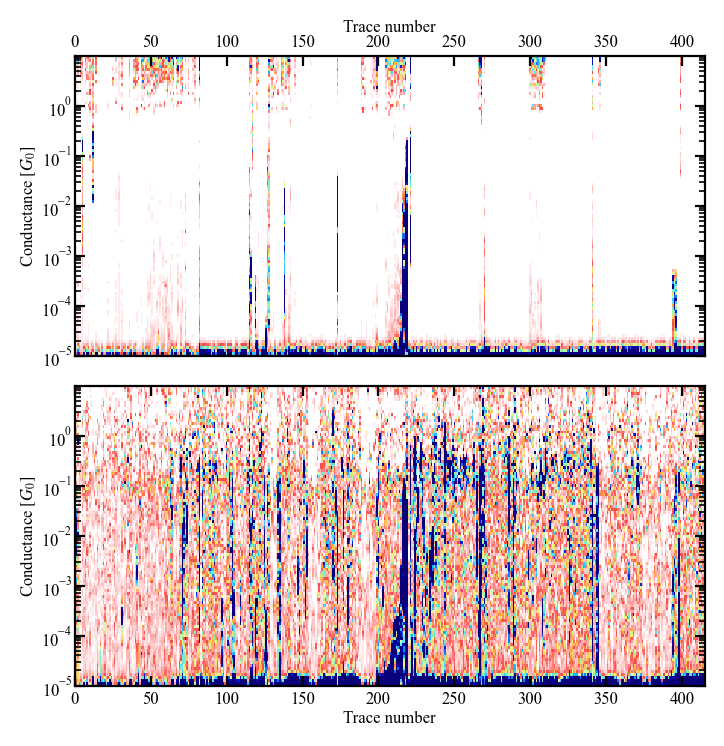

In [15]:
ax_pull, ax_push = hist_au_1.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

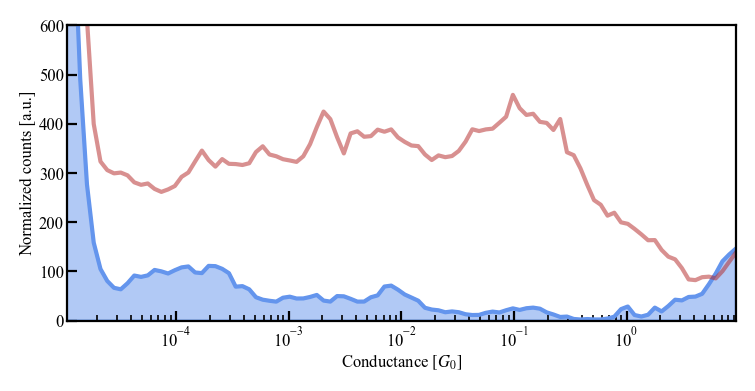

In [47]:
ax = hist_au_1.plot_hist_1d(dpi=200, ylims=(0, 600))
plt.savefig(home_folder.joinpath(f'csunya_arany.png'), bbox_inches='tight')

Ez pl egy nem túl szép mérés, nincs 1G0 csúcs.

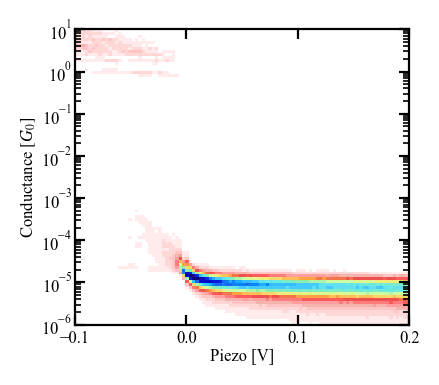

In [111]:
ax_pull = hist_au_1.plot_hist_2d_one(dpi=200, direction='pull')
# ax_pull.set_xlim(-0.5, 1)
plt.savefig(home_folder.joinpath(f'csunya_arany_2d.png'), bbox_inches='tight')

2D hisztogram újraszámolása 1e-5 G0-nál összetolva a görbéket.

In [18]:
hist_au_1.calc_hist_2d(align_at=1e-5,  # at which conductance value to align the traces
                       interpolate=True,  # use interpolation for the alignment of traces
                       range_pull=(-0.1, 0.2),  # x axis range pull
                       range_push=(-1.5, 0.5))

  0%|          | 0/416 [00:00<?, ?it/s]

2D histogram pull direction created from 416 traces
2D histogram push direction created from 416 traces


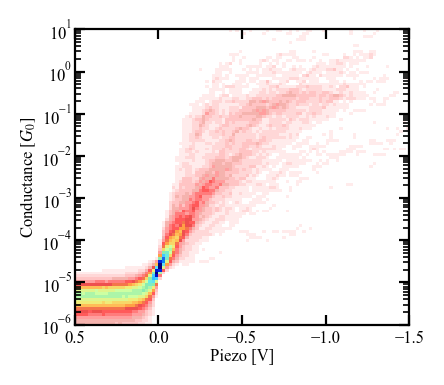

In [112]:
ax_push = hist_au_1.plot_hist_2d_one(dpi=200, direction='push')
# ax_push.set_xlim(1, -2)
plt.savefig(home_folder.joinpath(f'csunya_arany_2d2.png'), bbox_inches='tight')

## 425-972

In [20]:
breaks_pull_2, breaks_push_2 = filter_traces.filter_bj(folder=home_folder, filter_condition=filter_traces.filter_trace_broke,
                                                       start_trace=425, end_trace=972, smaller_than=1e-5)

In [21]:
print(f'Number of selected traces:\n    pull: {breaks_pull_2.shape[0]}, \n    push: {breaks_push_2.shape[0]}.')

Number of selected traces:
    pull: 547, 
    push: 548.


In [22]:
hist_au_2 = Histogram(folder=home_folder,
                      # start_trace=1, end_trace=424,
                      traces=breaks_pull_2,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [23]:
hist_au_2.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                     interpolate=True,  # use interpolation for the alignment of traces
                     range_pull=(-0.5, 1),  # x axis range pull
                     range_push=(-3, 1))

  0%|          | 0/547 [00:00<?, ?it/s]

Pull 2D histogram created from 547 traces
Push 2D histogram created from 547 traces


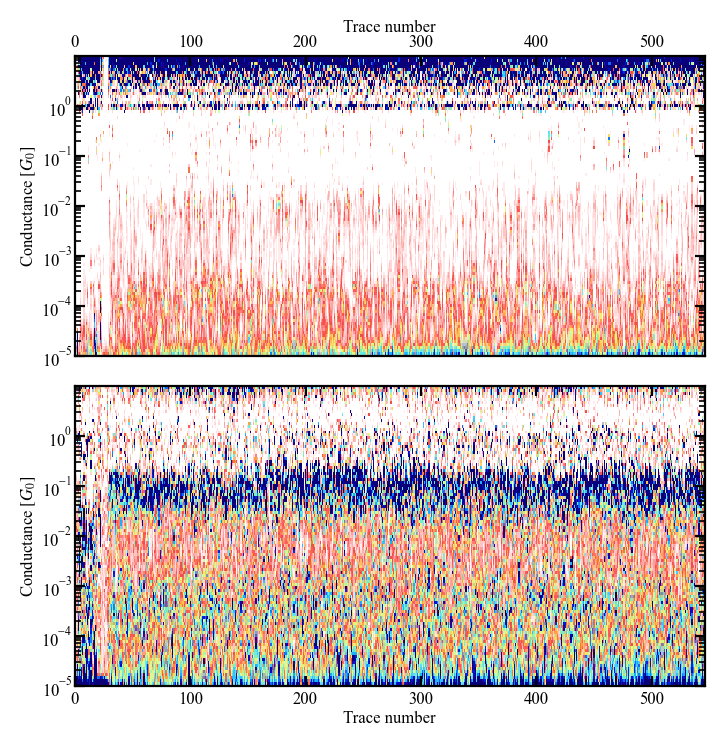

In [24]:
ax_pull, ax_push = hist_au_2.plot_temporal_hist(dpi=200, vmax_pull=2000, vmax_push=2000)

In [156]:
rcParams['font.size'] = 14
rcParams['ytick.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['axes.labelsize'] = 10

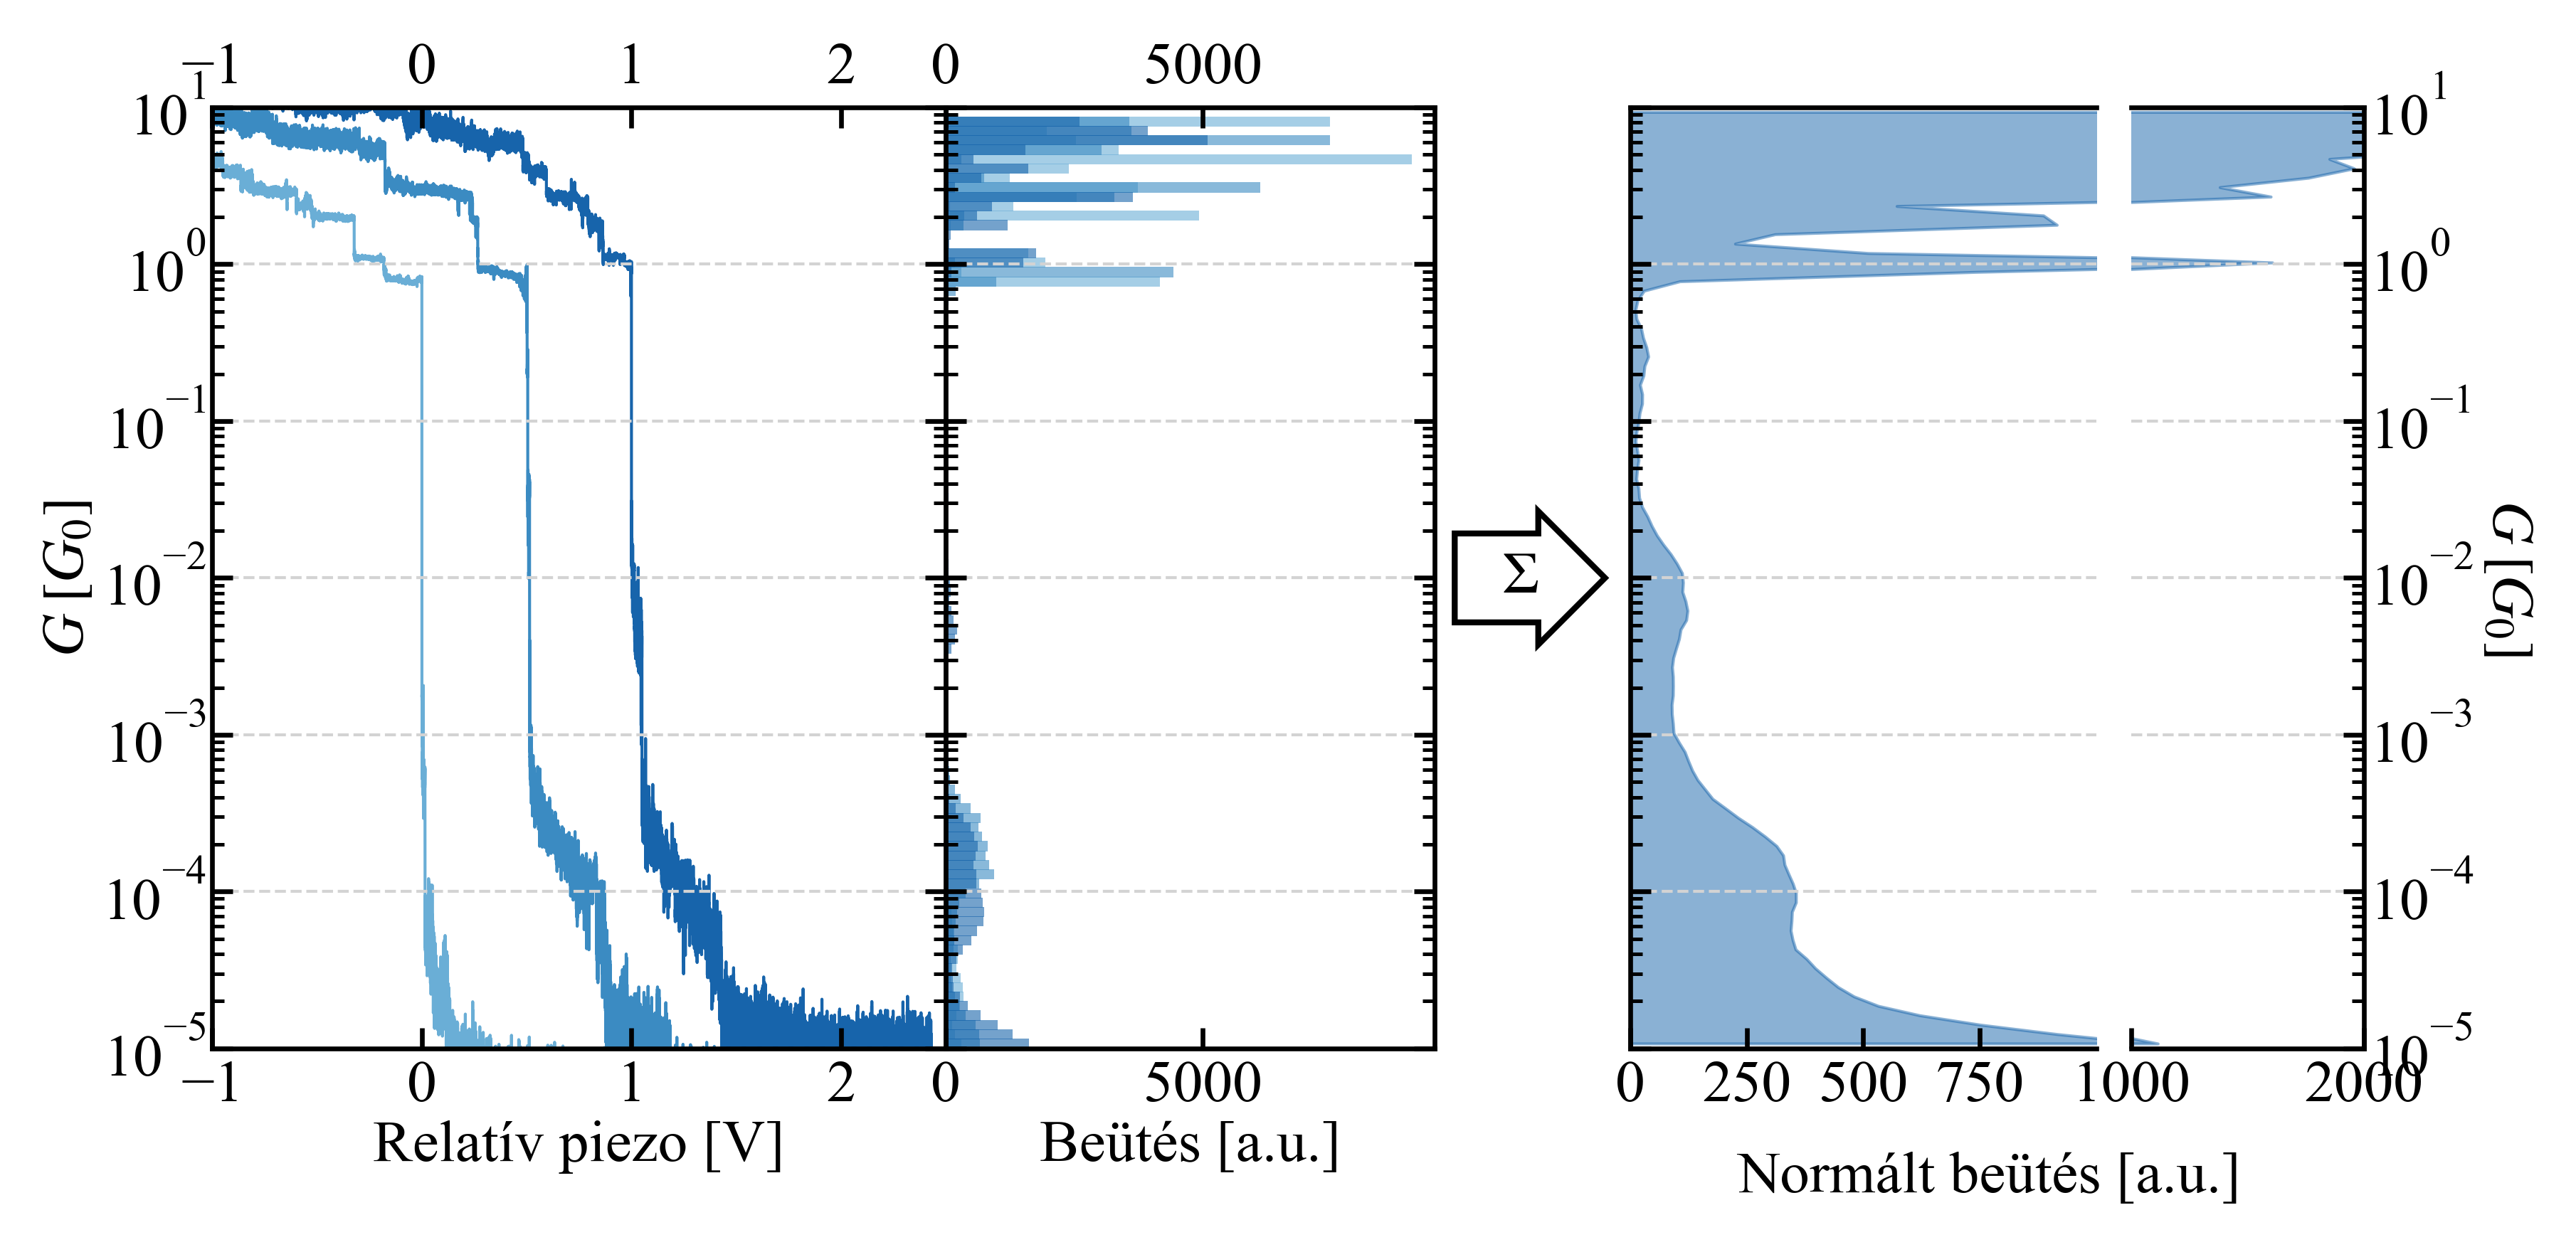

In [246]:
# RANDOM GÖRBÉK:
# fig, ax_traces, ax_singles, ax_hist_bot, ax_hist_top = hist_1d_demo(hist_au_2, traces=2, how='random', shift=1, figsize=utils.cm2inch(16, 7), dpi=600)
# KIVÁLASZTOTT GÖRBÉK:
fig, ax_traces, ax_singles, ax_hist_bot, ax_hist_top = hist_1d_demo(hist_au_2, traces=(438, 529, 737), how='random', shift=0.5, figsize=utils.cm2inch(16, 7), dpi=600)
# egész jó egyedi görbék: (438, 529, 583, 737, 790, 793)

ax_traces.set_ylabel(r'$G\;[G_{0}]$', fontsize=10)
ax_hist_top.set_ylabel(r'$G\;[G_{0}]$', rotation=270, labelpad=10, fontsize=10)

ax_traces.set_xlabel(r'Relatív piezo [V]', fontsize=10)
ax_singles.set_xlabel(r'Beütés [a.u.]', fontsize=10)
ax_hist_bot.text(s=r'Normált beütés [a.u.]', x=770, y=1.5e-6, ha='center', va='center', fontsize=10)

ax_traces.set_xlim(-1, 2.5)
ax_hist_bot.set_xlim(0, 1000)
ax_hist_top.set_xlim(1000, 2000)

ax_hist_bot.text(-250, 1e-2, r"  $\Sigma$  ",
                 ha="center", va="center", rotation=0, size=10,
                 bbox=dict(boxstyle="rarrow, pad=0.3",
                           fc="None", ec="black", lw=1))

for ax in (ax_traces, ax_hist_bot, ax_hist_top, ax_singles):
    ax.set_yscale('log')
    ax.grid(visible=True, which='major', axis='y', c='lightgrey', ls='--', lw=0.5)
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=9))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    
ax_hist_bot.tick_params(which='both', left=True, right=False, top=False, bottom=True, labelleft=False, labelright=False,
                        labeltop=False, labelbottom=True)

ax_hist_top.tick_params(which='both', left=False, right=True, top=False, bottom=True, labelleft=False, labelright=True,
                        labeltop=False, labelbottom=True)

ax_hist_bot.set_xticks([0, 250, 500, 750])
#plt.savefig(home_folder.joinpath(f'ha_ki_akarod_menteni.png'), bbox_inches='tight')

(1e-05, 40)

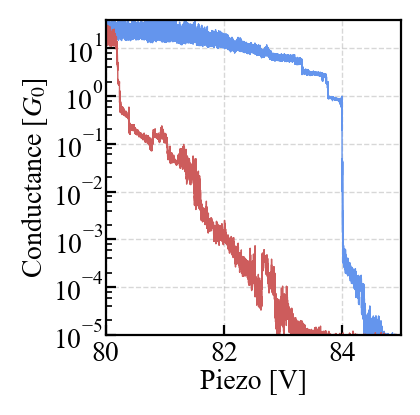

In [273]:
# (438, 529, 583, 737, 790, 793)

trace_pair = TracePair(529, load_from=home_folder)
ax = trace_pair.plot_trace_pair(dpi=200)
ax.set_xlim(80, 85)
ax.set_ylim(1e-5, 40)

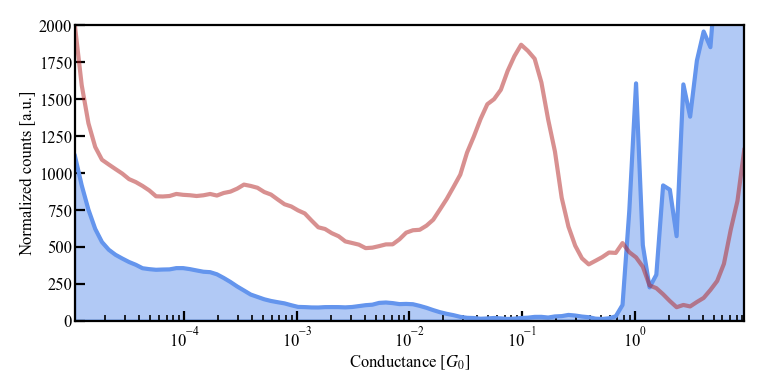

In [48]:
ax = hist_au_2.plot_hist_1d(dpi=200, ylims=(0, 2000))
plt.savefig(home_folder.joinpath(f'szebb_arany.png'), bbox_inches='tight')

Ez egy fokkal jobb, szép 1G0 csúcs

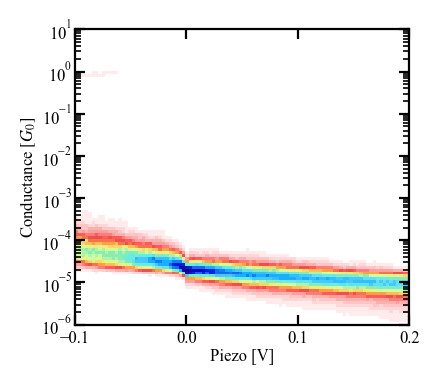

In [113]:
ax_pull = hist_au_2.plot_hist_2d_one(dpi=200, direction='pull')
plt.savefig(home_folder.joinpath(f'szebb_arany_2dszep.png'), bbox_inches='tight')


In [61]:
hist_au_2.calc_hist_2d(align_at=1e-5,  # at which conductance value to align the traces
                      interpolate=True,  # use interpolation for the alignment of traces
                      range_pull=(-0.1, 0.2),  # x axis range pull
                      range_push=(-3, 1))

  0%|          | 0/547 [00:00<?, ?it/s]

2D histogram pull direction created from 547 traces
2D histogram push direction created from 547 traces


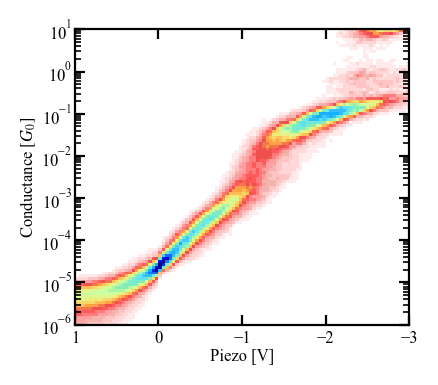

In [102]:
ax_push = hist_au_2.plot_hist_2d_one(dpi=200, direction='push')
# ax_push.set_xlim(1, -2)
plt.savefig(home_folder.joinpath(f'szebb_arany_2d2.png'), bbox_inches='tight')


## BPY
### 1502-2502

In [29]:
breaks_pull_bp_1, breaks_push_bp_1 = filter_traces.filter_bj(folder=home_folder, filter_condition=filter_traces.filter_trace_broke,
                                                             start_trace=1502, end_trace=2502, smaller_than=1e-5)

In [30]:
print(f'Number of selected traces:\n    pull: {breaks_pull_bp_1.shape[0]}, \n    push: {breaks_push_bp_1.shape[0]}.')

Number of selected traces:
    pull: 1001, 
    push: 1000.


In [31]:
hist_bpy_1 = Histogram(folder=home_folder,
                      # start_trace=1, end_trace=424,
                      traces=breaks_push_bp_1,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [32]:
hist_bpy_1.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                      interpolate=True,  # use interpolation for the alignment of traces
                      range_pull=(-0.1, 0.2),  # x axis range pull
                      range_push=(-0.5, 1))

  0%|          | 0/1000 [00:00<?, ?it/s]

Pull 2D histogram created from 1000 traces
Push 2D histogram created from 1000 traces


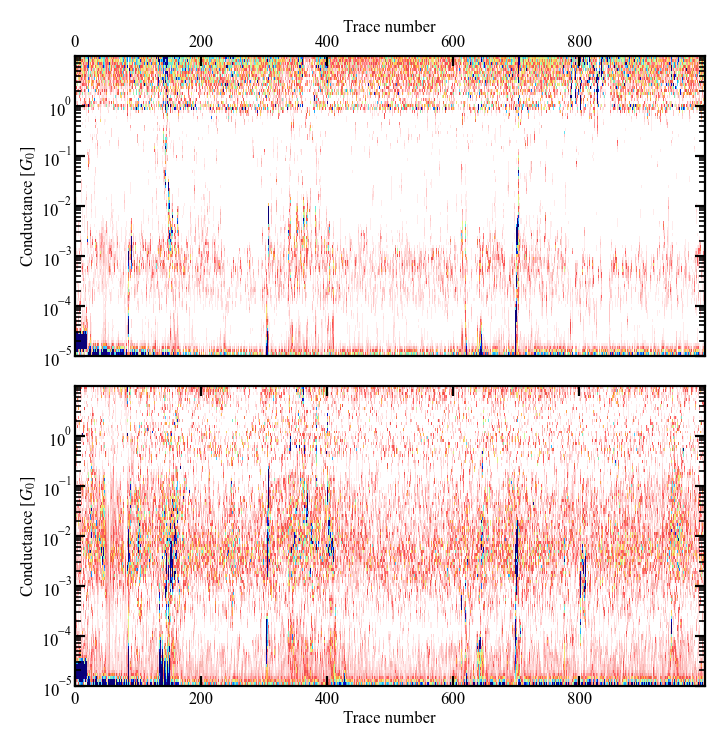

In [33]:
ax_pull, ax_push = hist_bpy_1.plot_temporal_hist(dpi=200, vmax_pull=1500, vmax_push=1500)

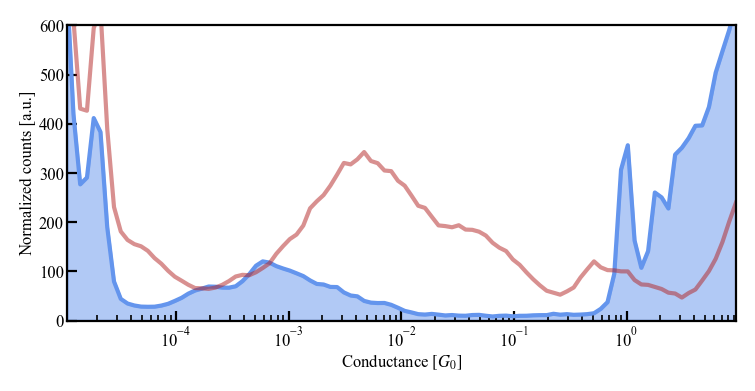

In [74]:
ax = hist_bpy_1.plot_hist_1d(dpi=200, ylims=(0, 600))
plt.savefig(home_folder.joinpath(f'bpy_1.png'), bbox_inches='tight')

### 2D histogram:
I drew some example traces, to demonstrate

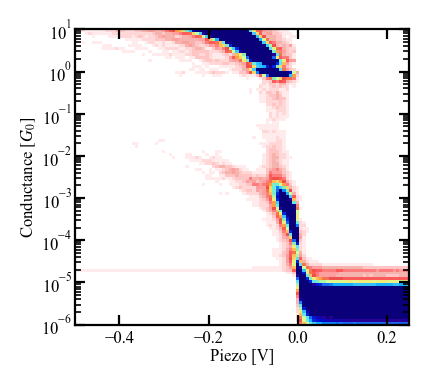

In [107]:
ax_pull = hist_bpy_1.plot_hist_2d_one(dpi=200, direction='pull', vmax = 15000)
# for i in np.random.choice(a=np.arange(1505, 2502), size=3):  # 2001, 1789, 1868, 1971
#     print(i)
#     trace_pair=TracePair(load_from=home_folder, trace=i)
#     trace_pair.align_trace(align_at=0.5)
#     ax_pull.plot(trace_pair.aligned_piezo_pull, trace_pair.conductance_pull, lw=0.7, alpha=0.5)
ax_pull.set_ylim(1e-6, 10) # ehhez a hisztogram számolásnál is így kell megadni az intervallumot
# ax_pull.set_xlim(-0.1, 0.25)
plt.savefig(home_folder.joinpath(f'bpy_2d.csunyabb.png'), bbox_inches='tight')

In [36]:
hist_bpy_1.calc_hist_2d(align_at=1e-5,  # at which conductance value to align the traces
                        interpolate=True,  # use interpolation for the alignment of traces
                        range_pull=(-0.5, 0.25),  # x axis range pull
                        range_push=(-0.4, 0.2))

  0%|          | 0/1000 [00:00<?, ?it/s]

2D histogram pull direction created from 1000 traces
2D histogram push direction created from 1000 traces


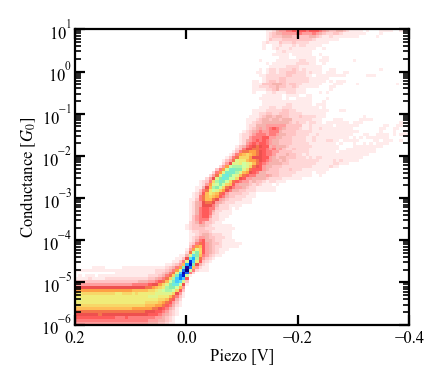

In [108]:
ax_push = hist_bpy_1.plot_hist_2d_one(dpi=200, direction='push')

# for i in np.random.choice(a=np.arange(1505, 2502), size=3):  # 2001, 1789, 1868, 1971
#     print(i)
#     trace_pair=TracePair(load_from=home_folder, trace=i)
#     trace_pair.align_trace(align_at=1e-5)
#     ax_push.plot(trace_pair.aligned_piezo_push, trace_pair.conductance_push, lw=0.7, alpha=0.5)
ax_push.set_ylim(1e-6, 10)
plt.savefig(home_folder.joinpath(f'bpy_2d.csunyabb1.png'), bbox_inches='tight')

### 4703-5504

In [79]:
breaks_pull_bp_2, breaks_push_bp_2 = filter_traces.filter_bj(folder=home_folder, filter_condition=filter_traces.filter_trace_broke,
                                                             start_trace=4703, end_trace=5504, smaller_than=1e-5)

In [81]:
print(f'Number of selected traces:\n    pull: {breaks_pull_bp_2.shape[0]}, \n    push: {breaks_push_bp_2.shape[0]}.')

Number of selected traces:
    pull: 801, 
    push: 802.


In [82]:
hist_bpy_2 = Histogram(folder=home_folder,
                       # start_trace=1, end_trace=424,
                       traces=breaks_pull_bp_2,
                       conductance_range=(1e-5, 10),
                       conductance_log_scale=True,
                       conductance_bins_num=100,
                       conductance_bins_mode='total')

In [83]:
hist_bpy_2.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                      interpolate=True,  # use interpolation for the alignment of traces
                      range_pull=(-0.1, 0.15),  # x axis range pull
                      range_push=(-0.5, 1.5))

  0%|          | 0/801 [00:00<?, ?it/s]

Pull 2D histogram created from 801 traces
Push 2D histogram created from 801 traces


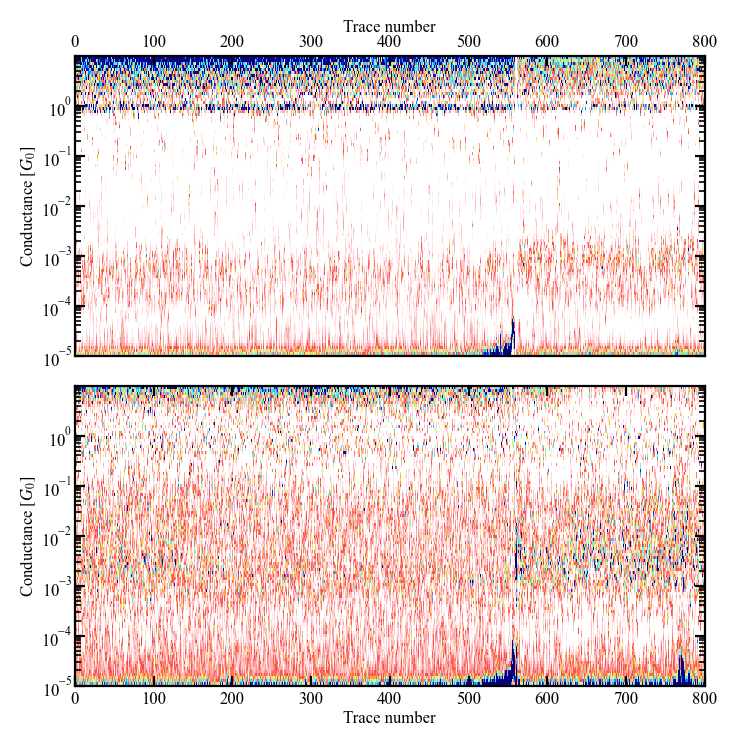

In [36]:
ax_pull, ax_push = hist_bpy_2.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

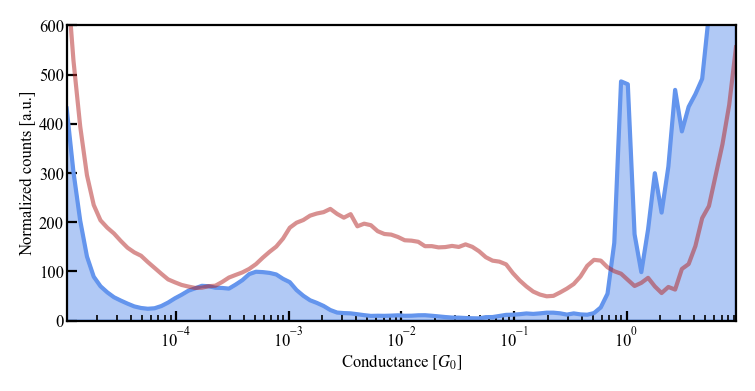

In [85]:
ax = hist_bpy_2.plot_hist_1d(dpi=200, ylims=(0, 600))
plt.savefig(home_folder.joinpath(f'bpy_2.png'), bbox_inches='tight')

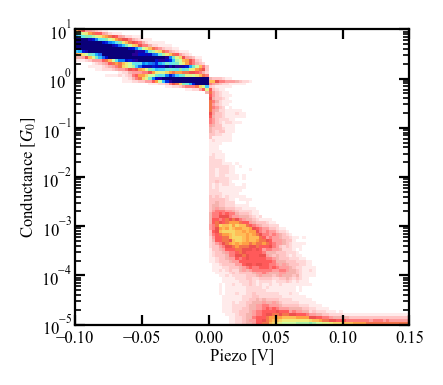

In [109]:
ax_pull = hist_bpy_2.plot_hist_2d_one(dpi=200, direction='pull', vmax = 12000)
# ax_pull.set_xlim(-0.5, 1)
plt.savefig(home_folder.joinpath(f'bpy_2d.jobb.png'), bbox_inches='tight')

In [39]:
hist_bpy_2.calc_hist_2d(align_at=1e-5,  # at which conductance value to align the traces
                        interpolate=True,  # use interpolation for the alignment of traces
                        range_pull=(-0.5, 0.25),  # x axis range pull
                        range_push=(-0.25, 0.1))

  0%|          | 0/801 [00:00<?, ?it/s]

2D histogram pull direction created from 801 traces
2D histogram push direction created from 801 traces


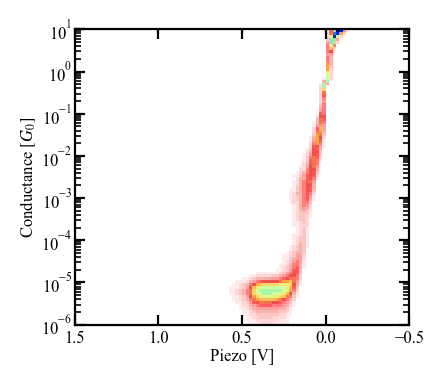

In [110]:
ax_push = hist_bpy_2.plot_hist_2d_one(dpi=200, direction='push')
plt.savefig(home_folder.joinpath(f'bpy_2djobb1.png'), bbox_inches='tight')

## Hold measurements

### Stability

In [86]:
traces = np.append(np.arange(3701, 4703, 1), np.arange(5505, 7728, 1))

In [87]:
which_trace = np.random.choice(traces)
print(which_trace)

6199


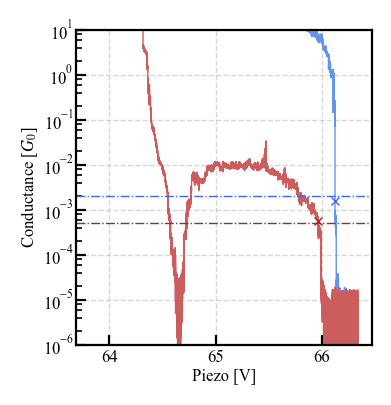

In [89]:
trace_pair = TracePair(3701, load_from=home_folder)
ax = trace_pair.plot_trace_pair(dpi=200, plot_trigger=True)

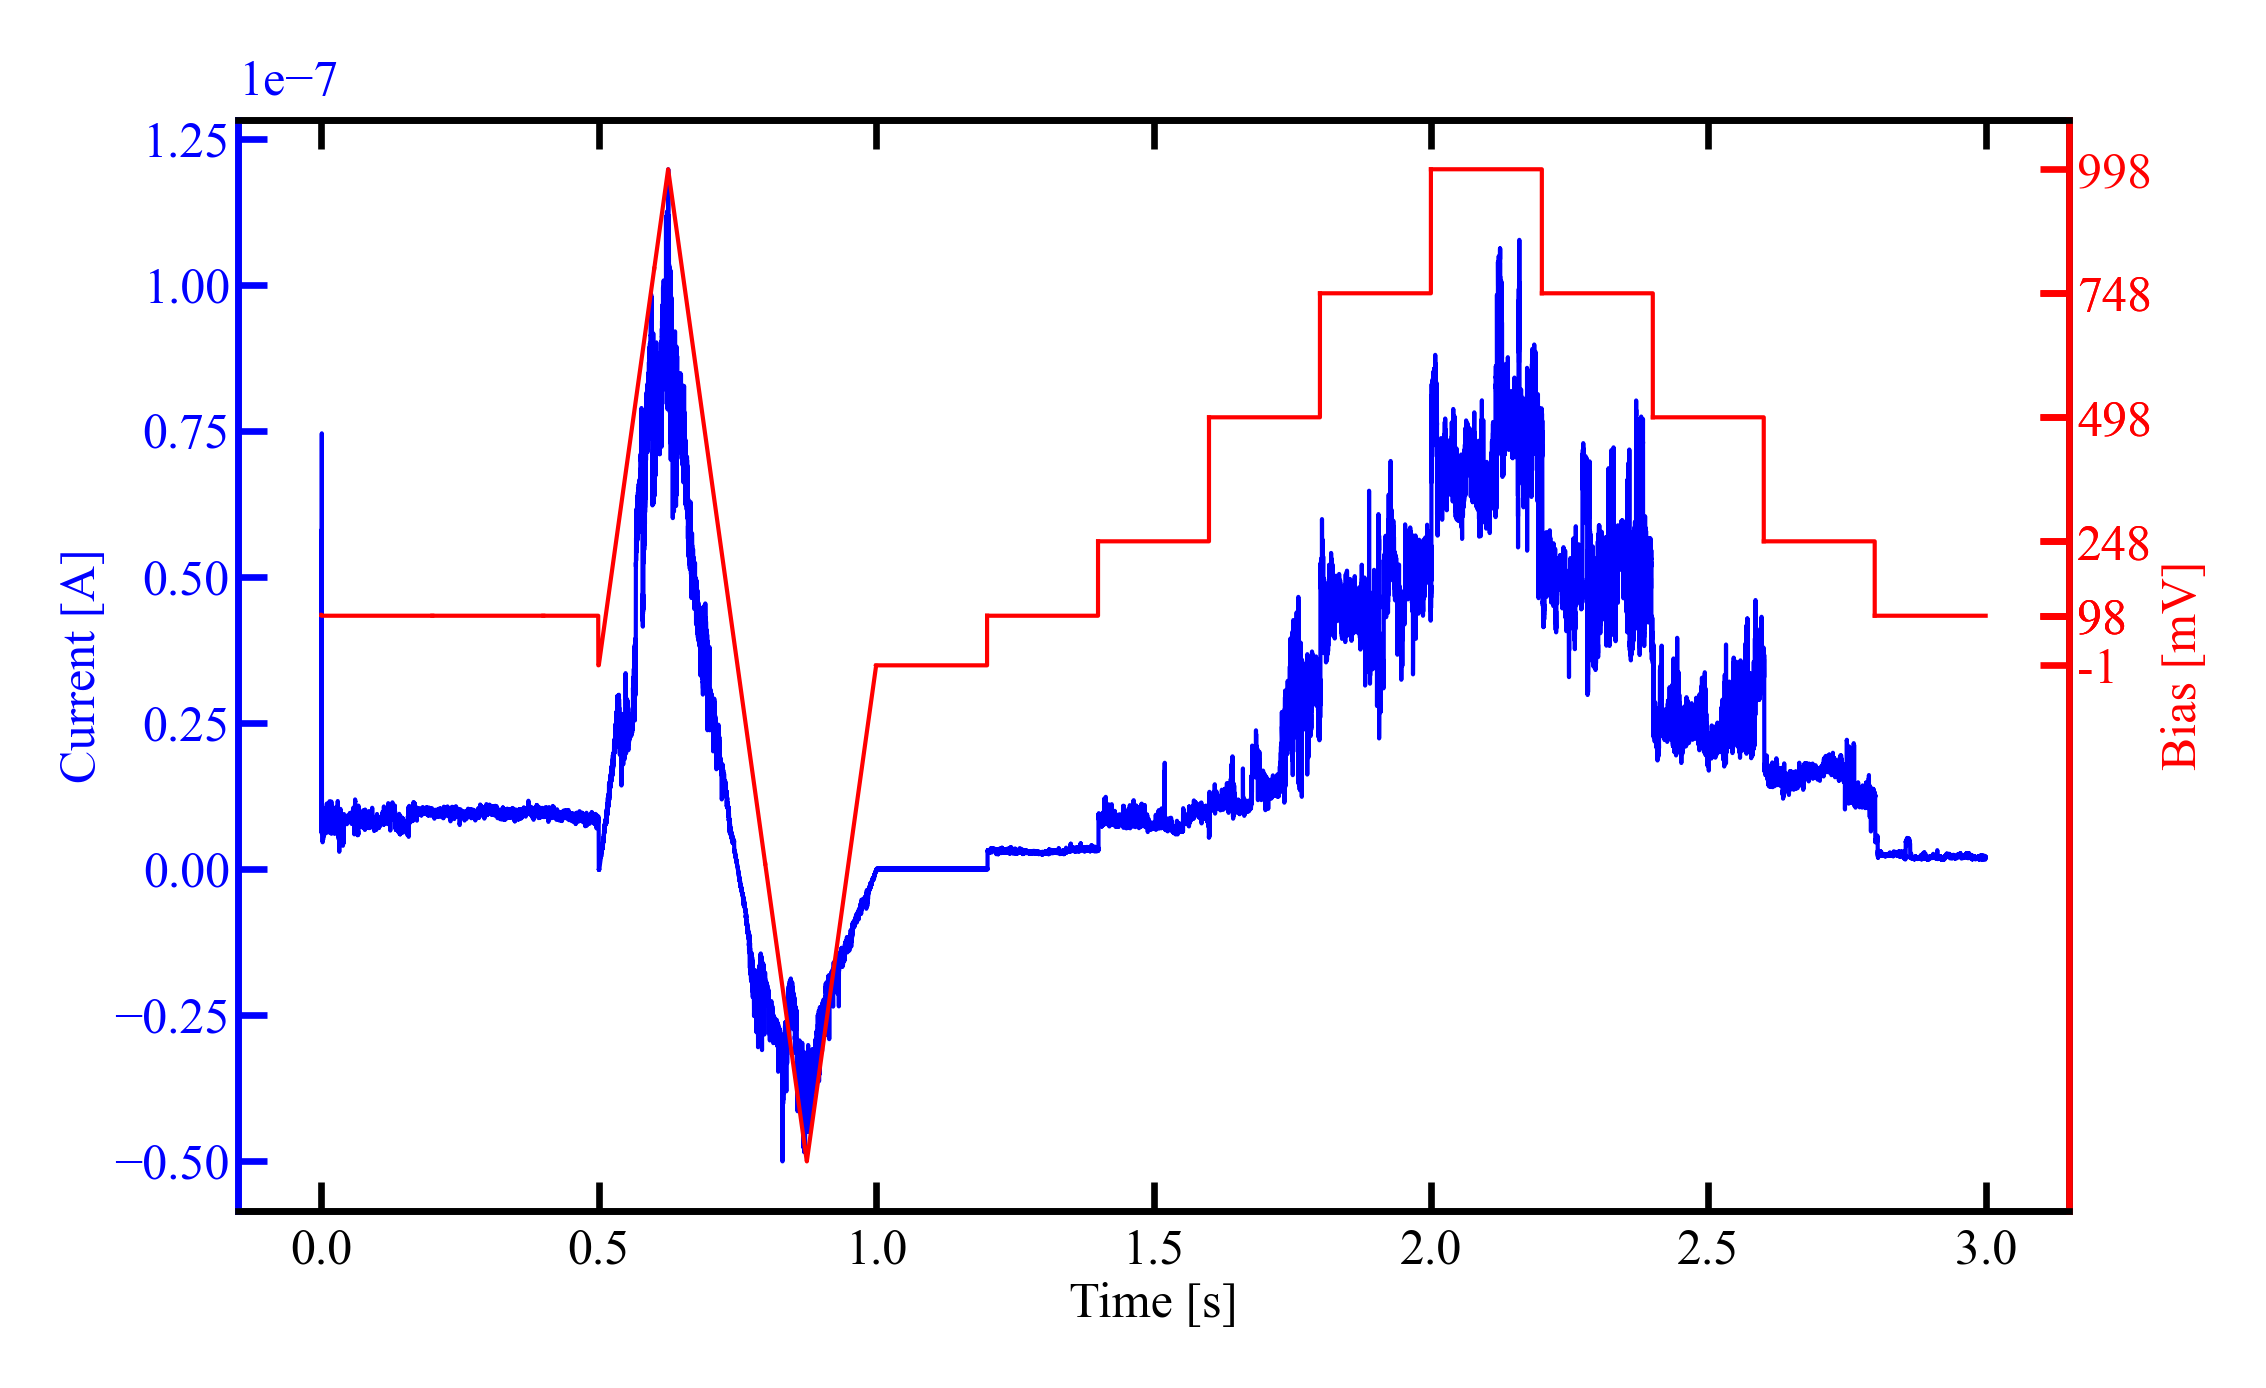

In [91]:
trace_pair = TracePair(3710, load_from=home_folder)

hold_trace = HoldTrace(3710, load_from=home_folder,
                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                       sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)
hold_trace.plot_hold_traces(conductance=False, log_scale_y=False, ax_colors=('blue', 'red'))
# választhatsz szimpatikusabb színeket, lásd: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.savefig(home_folder.joinpath(f'iv.png'), bbox_inches='tight')

In [45]:
print(trace_pair.hold_set_pull)
print(trace_pair.hold_conductance_pull)

0.002
0.001992296


In [81]:
# del trace_nums_pull
# del trace_nums_push
# del hold_sets_pull
# del hold_sets_push
# del hold_triggers_pull
# del hold_triggers_push
# del hold_starts_pull
# del hold_starts_push
# del hold_ends_pull
# del hold_ends_push

In [93]:
# for which_trace in tqdm(traces, desc='Iterating over traces:'):
#     trace_pair = TracePair(which_trace, load_from=home_folder)

#     hold_trace = HoldTrace(which_trace, load_from=home_folder,
#                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
#                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)
#     try:
#         trace_nums_pull = np.append(trace_nums_pull, trace_pair.trace_num)
#         trace_nums_push = np.append(trace_nums_push, trace_pair.trace_num)

#         hold_sets_pull = np.append(hold_sets_pull, trace_pair.hold_set_pull)
#         hold_sets_push = np.append(hold_sets_push, trace_pair.hold_set_push)

#         hold_triggers_pull = np.append(hold_triggers_pull, trace_pair.hold_conductance_pull)
#         hold_triggers_push = np.append(hold_triggers_push, trace_pair.hold_conductance_push)

#         hold_starts_pull = np.append(hold_starts_pull, hold_trace.G_hold_pull)
#         hold_starts_push = np.append(hold_starts_push, hold_trace.G_hold_push)

#         hold_ends_pull = np.append(hold_ends_pull, hold_trace.G_avg_pull)
#         hold_ends_push = np.append(hold_ends_push, hold_trace.G_avg_push)
#     except NameError:
#         trace_nums_pull = np.array([trace_pair.trace_num])
#         trace_nums_push = np.array([trace_pair.trace_num])
#         hold_sets_pull = np.array([trace_pair.hold_set_pull])
#         hold_sets_push = np.array([trace_pair.hold_set_push])
#         hold_triggers_pull = np.array([trace_pair.hold_conductance_pull])
#         hold_triggers_push = np.array([trace_pair.hold_conductance_push])
#         hold_starts_pull = np.array([hold_trace.G_hold_pull])
#         hold_starts_push = np.array([hold_trace.G_hold_push])
#         hold_ends_pull = np.array([hold_trace.G_avg_pull])
#         hold_ends_push = np.array([hold_trace.G_avg_push])

In [89]:
# pull_df = pd.DataFrame({'trace_num': trace_nums_pull, 'set': hold_sets_pull, 'trigger': hold_triggers_pull, 'start': hold_starts_pull, 'end': hold_ends_pull})
# push_df = pd.DataFrame({'trace_num': trace_nums_push, 'set': hold_sets_push, 'trigger': hold_triggers_push, 'start': hold_starts_push, 'end': hold_ends_push})

In [4]:
# pull_df.to_csv(home_folder.joinpath('results/stability/pull_stability_data.csv'), index=False)
# push_df.to_csv(home_folder.joinpath('results/stability/push_stability_data.csv'), index=False)

In [156]:
pull_df = pd.read_csv(home_folder.joinpath('results/stability/pull_stability_data.csv'))
push_df = pd.read_csv(home_folder.joinpath('results/stability/push_stability_data.csv'))

In [6]:
pull_df

trace_num     set   trigger     start       end
0          3701  0.0020  0.001567  0.000588  0.000686
1          3702  0.0020  0.001993  0.000994  0.000003
2          3703  0.0020  0.001760  0.000580  0.000004
3          3704  0.0020  0.000735  0.000588  0.000008
4          3705  0.0020  0.016382  0.000576  0.000003
...         ...     ...       ...       ...       ...
3220       7723  0.0005  0.002244  0.001603  0.000048
3221       7724  0.0005  0.004823  0.001468  0.005667
3222       7725  0.0005  0.004904  0.005575  0.002365
3223       7726  0.0005  0.004804  0.005339  0.003409
3224       7727  0.0005  0.005094  0.003089  0.011314

[3225 rows x 5 columns]

In [7]:
push_df

trace_num     set   trigger     start       end
0          3701  0.0005  0.000567  0.000399  0.000635
1          3702  0.0005  0.000527  0.000864  0.002038
2          3703  0.0005  0.000506  0.000461  0.002354
3          3704  0.0005  0.000482  0.000423  0.000702
4          3705  0.0005  0.000671  0.000705  0.001610
...         ...     ...       ...       ...       ...
3220       7723  0.0020  0.002087  0.002381  0.003390
3221       7724  0.0020  0.002026  0.001286  0.003782
3222       7725  0.0020  0.002003  0.001024  0.000930
3223       7726  0.0020  0.002049  0.001815  0.004335
3224       7727  0.0020  0.001963  0.000553  0.000164

[3225 rows x 5 columns]

In [8]:
def scatter_from_source(df: pd.DataFrame, x: str, y: str, ax: Optional = None, log_scale: bool = False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=utils.cm2inch((5, 5)), dpi=200)
        ax.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
    
    ax.scatter(df[x], df[y], s=2, edgecolor='None', **kwargs)
    if log_scale:
        ax.set_xscale('log')
        ax.set_yscale('log')
    return ax

In [95]:
def heatmap_from_source(df: pd.DataFrame, x: str, y: str,
                        ax: Optional = None, log_scale: bool = False, num_bins: Tuple[int, int] = (100, 100),
                        xrange: Optional = None, yrange: Optional = None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=utils.cm2inch(5,5), dpi=200)
        ax.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        
    
    if xrange is None:
        xrange = (min(df[x]), max(df[x]))
    if yrange is None:
        yrange = (min(df[y]), max(df[y]))
    
    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=num_bins[0])
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=num_bins[1])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    h, xedges, yedges = np.histogram2d(df[x], df[y], bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)

    h = h.T  # need to take the transpose of h
    
    im = ax.pcolormesh(x_mesh, y_mesh, h, cmap=utils.cmap_geo32, **kwargs)
    
    ax_cbar = ax.inset_axes(bounds=(0.1, 0.9, 0.5, 0.05))
    plt.colorbar(im, cax=ax_cbar, orientation='horizontal')
     
    return ax

In [25]:
def scatter_hist_from_source(df: pd.DataFrame, x: str, y: str, ax: Optional = None, log_scale: bool = False, **kwargs):

    fig = plt.figure(figsize=(4, 4), dpi=200)
    gs = plt.GridSpec(2, 2, figure=fig,
                      left=0.1, right=0.9, top=0.9, bottom=0.1, height_ratios=(1, 2), width_ratios=(2, 1),
                      hspace=0, wspace=0)
    ax_hist1 = fig.add_subplot(gs[0, 0])
    ax_hist2 = fig.add_subplot(gs[1, 1])
    ax_scat = fig.add_subplot(gs[1, 0])
    
    if 'c' in kwargs.keys():
        plot_color=kwargs['c']
    
    ax_scat = scatter_from_source(df=pull_df, x=x, y=y, log_scale=True, ax=ax_scat, **kwargs)
    xbins1, hist1 = utils.calc_hist_1d_single(data=pull_df[x], xrange=ax_scat.get_xlim(),
                                              xbins_num=100, log_scale=True, bin_mode='total')
    xbins2, hist2 = utils.calc_hist_1d_single(data=pull_df[y], xrange=ax_scat.get_ylim(),
                                              xbins_num=100, log_scale=True, bin_mode='total')

    print(sum(hist1))
    print(sum(hist2))

    ax_hist1.plot(xbins1, hist1, c=plot_color)
    ax_hist2.plot(hist2, xbins2, c=plot_color)

    ax_hist1.set_xscale(ax_scat.get_xscale())
    ax_hist2.set_yscale(ax_scat.get_yscale())
    ax_hist1.set_xlim(ax_scat.get_xlim())
    ax_hist2.set_ylim(ax_scat.get_ylim())
    
    ax_hist1.set_xlabel(x)
    ax_hist1.xaxis.set_label_position('top')
    ax_hist2.set_ylabel(y, rotation=270, labelpad=6)
    ax_hist2.yaxis.set_label_position('right')
    ax_scat.set_xlabel(x)
    ax_scat.set_ylabel(y)

    ax_scat.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
    ax_hist1.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=True, labeltop=True, labelbottom=False)
    ax_hist2.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=False, labelright=True, labeltop=True, labelbottom=True)

In [126]:
def heatmap_hist_from_source(df: pd.DataFrame, x: str, y: str, ax: Optional = None, log_scale: bool = False,
                             xrange: Optional = None, yrange: Optional = None, num_bins: Tuple[int, int] = (100, 100), **kwargs):

    fig = plt.figure(figsize=(4, 4), dpi=200)
    gs = plt.GridSpec(2, 2, figure=fig,
                      left=0.1, right=0.9, top=0.9, bottom=0.1, height_ratios=(1, 2), width_ratios=(2, 1),
                      hspace=0, wspace=0)
    ax_hist1 = fig.add_subplot(gs[0, 0])
    ax_hist2 = fig.add_subplot(gs[1, 1])
    ax_scat = fig.add_subplot(gs[1, 0])
    
    if 'c' in kwargs.keys():
        plot_color=kwargs['c']
        kwargs.pop('c')
    
    if xrange is None:
        xrange=(min(df[x]), max(df[x]))
    if yrange is None:
        yrange=(min(df[y]), max(df[y]))
    
    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=num_bins[0])
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=num_bins[1])
    
    h, xedges, yedges = np.histogram2d(df[x], df[y], bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)

    h = h.T  # need to take the transpose of h
    
    im = ax_scat.pcolormesh(x_mesh, y_mesh, h, cmap=utils.cmap_geo32, **kwargs) 
    xbins1, hist1 = utils.calc_hist_1d_single(data=pull_df[x], xrange=ax_scat.get_xlim(),
                                              xbins_num=100, log_scale=True, bin_mode='total')
    xbins2, hist2 = utils.calc_hist_1d_single(data=pull_df[y], xrange=ax_scat.get_ylim(),
                                              xbins_num=100, log_scale=True, bin_mode='total')

    ax_hist1.plot(xbins1, hist1)
    ax_hist2.plot(hist2, xbins2)
    
    
    ax_scat.set_xscale('log')
    ax_scat.set_yscale('log')
    ax_hist1.set_xscale(ax_scat.get_xscale())
    ax_hist2.set_yscale(ax_scat.get_yscale())
    ax_hist1.set_xlim(ax_scat.get_xlim())
    ax_hist2.set_ylim(ax_scat.get_ylim())
    
    ax_hist1.set_xlabel(x)
    ax_hist1.xaxis.set_label_position('top')
    ax_hist2.set_ylabel(y, rotation=270, labelpad=6)
    ax_hist2.yaxis.set_label_position('right')
    ax_scat.set_xlabel(x)
    ax_scat.set_ylabel(y)

    ax_scat.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
    ax_hist1.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=True, labeltop=True, labelbottom=False)
    ax_hist2.tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=False, labelright=True, labeltop=True, labelbottom=True)
    
    ax_cbar = ax_scat.inset_axes(bounds=(0.1, 0.9, 0.5, 0.05))
    plt.colorbar(im, cax=ax_cbar, orientation='horizontal')
    
    # return h, x_mesh, y_mesh

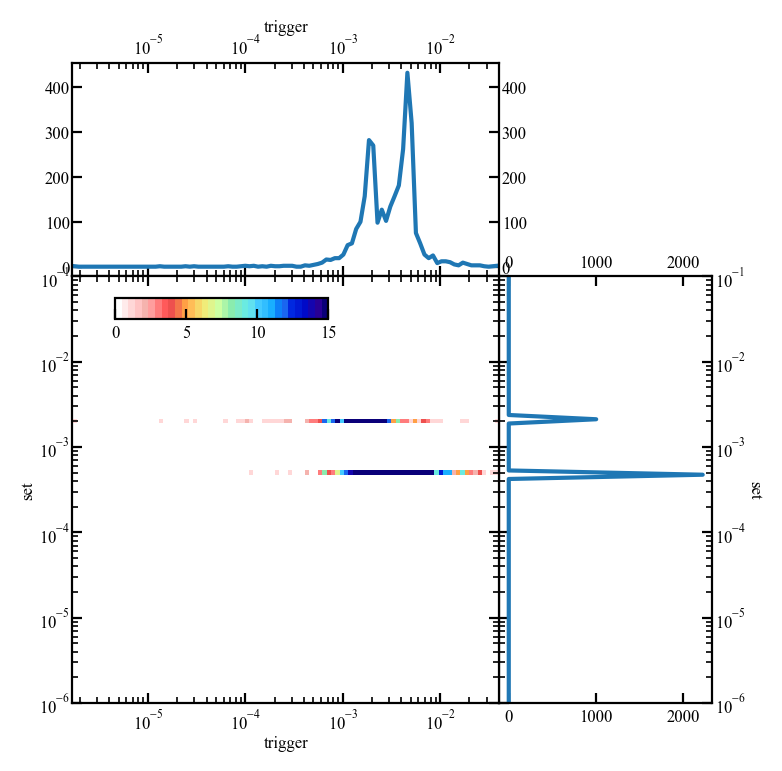

In [133]:
heatmap_hist_from_source(df=pull_df, x='trigger', y='set', log_scale=True, c='red', vmax=15, yrange=(1e-6, 1e-1))

3225
3225


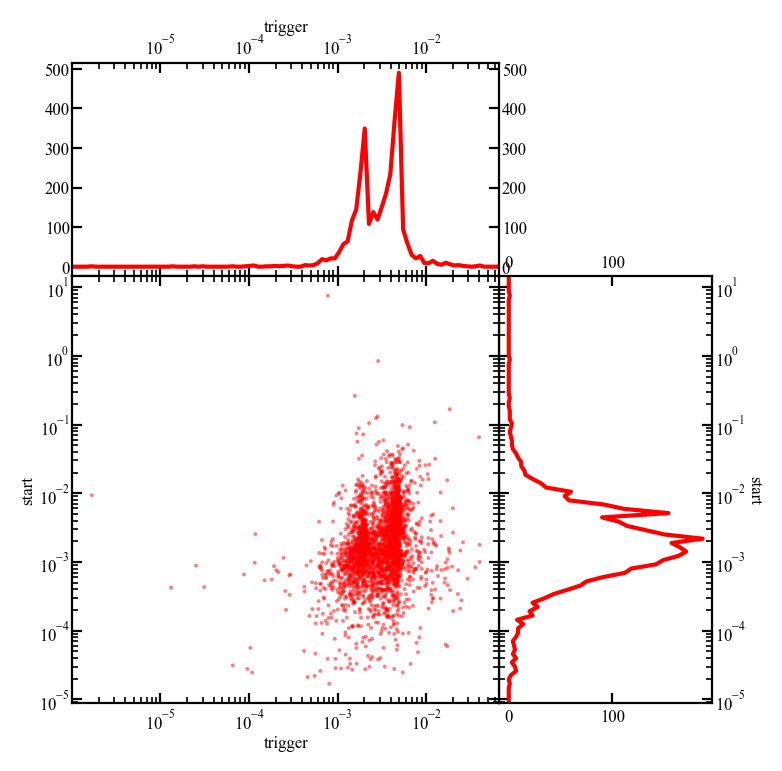

In [28]:
scatter_hist_from_source(df=pull_df, x='trigger', y='start', log_scale=True, c='red', alpha=0.5)

In [152]:
pull_df.set

0       0.0020
1       0.0020
2       0.0020
3       0.0020
4       0.0020
         ...  
3220    0.0005
3221    0.0005
3222    0.0005
3223    0.0005
3224    0.0005
Name: set, Length: 3225, dtype: float64

In [159]:
## probably there was some error in labview when setting the trigger value, replace them with the probably right ones
# pull_df.set[pull_df.set == 2e-3] = 5e-3
# pull_df.set[pull_df.set == 0.0005] = 2e-3

In [166]:
pull_df[pull_df.set == 2e-3]

trace_num    set   trigger     start       end
1002       5505  0.002  0.003158  0.003065  0.000015
1003       5506  0.002  0.004983  0.004756  0.000006
1004       5507  0.002  0.002139  0.000775  0.000005
1005       5508  0.002  0.001917  0.000957  0.000006
1006       5509  0.002  0.004604  0.002596  0.000006
...         ...    ...       ...       ...       ...
3220       7723  0.002  0.002244  0.001603  0.000048
3221       7724  0.002  0.004823  0.001468  0.005667
3222       7725  0.002  0.004904  0.005575  0.002365
3223       7726  0.002  0.004804  0.005339  0.003409
3224       7727  0.002  0.005094  0.003089  0.011314

[2223 rows x 5 columns]

1002
1002
999
1002


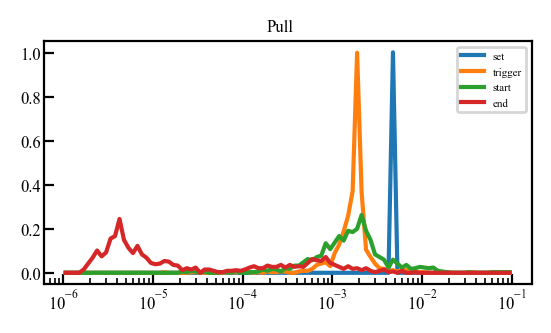

In [190]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

scale_factor = 1000
for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=pull_df[pull_df.set == 5e-3][i], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    
    if i == 'trigger':
        scale_factor = max(hist)
    # ax.plot(xbins, hist, label=i)
    ax.plot(xbins, hist/scale_factor, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Pull', y=0.95, fontsize=6)
    print(sum(hist))

1002
1002
1002
1002


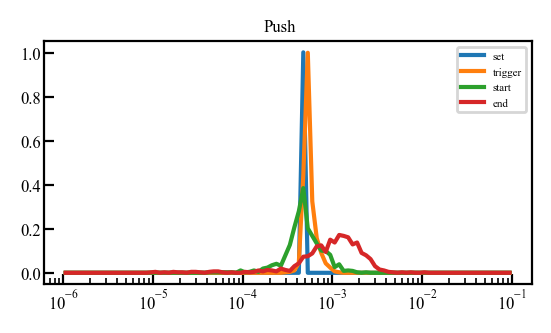

In [193]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

scale_factor = 1000
for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=push_df[push_df.set == 5e-4][i], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    
    if i == 'trigger':
        scale_factor = max(hist)
    # ax.plot(xbins, hist, label=i)
    ax.plot(xbins, hist/scale_factor, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Push', y=0.95, fontsize=6)
    print(sum(hist))

2223
2223
2218
2222


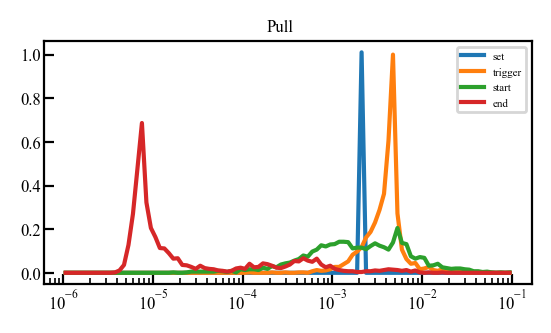

In [191]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

scale_factor = 2200
for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=pull_df[pull_df.set == 2e-3][i], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    # ax.plot(xbins, hist, label=i)
    if i == 'trigger':
        scale_factor = max(hist)
    ax.plot(xbins, hist/scale_factor, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Pull', y=0.95, fontsize=6)
    print(sum(hist))

2223
2223
2223
2223


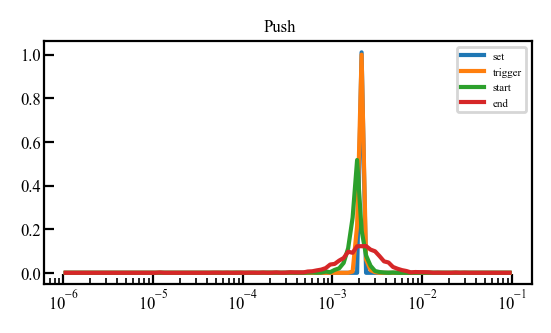

In [192]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

scale_factor = 2200
for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=push_df[push_df.set == 2e-3][i], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    # ax.plot(xbins, hist, label=i)
    if i == 'trigger':
        scale_factor = max(hist)
    ax.plot(xbins, hist/scale_factor, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Push', y=0.95, fontsize=6)
    print(sum(hist))

In [144]:
# pull_df.trigger

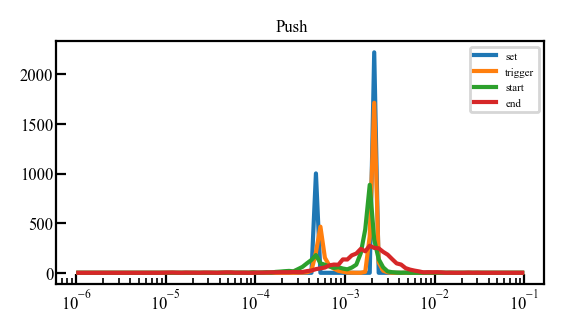

In [87]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

for i in push_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=push_df[i], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    ax.plot(xbins, hist, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Push', y=0.95, fontsize=6)

In [98]:
test_dict = {('a', 'b'): 1, ('c', 'd'): 2}
test_dict

{('a', 'b'): 1, ('c', 'd'): 2}

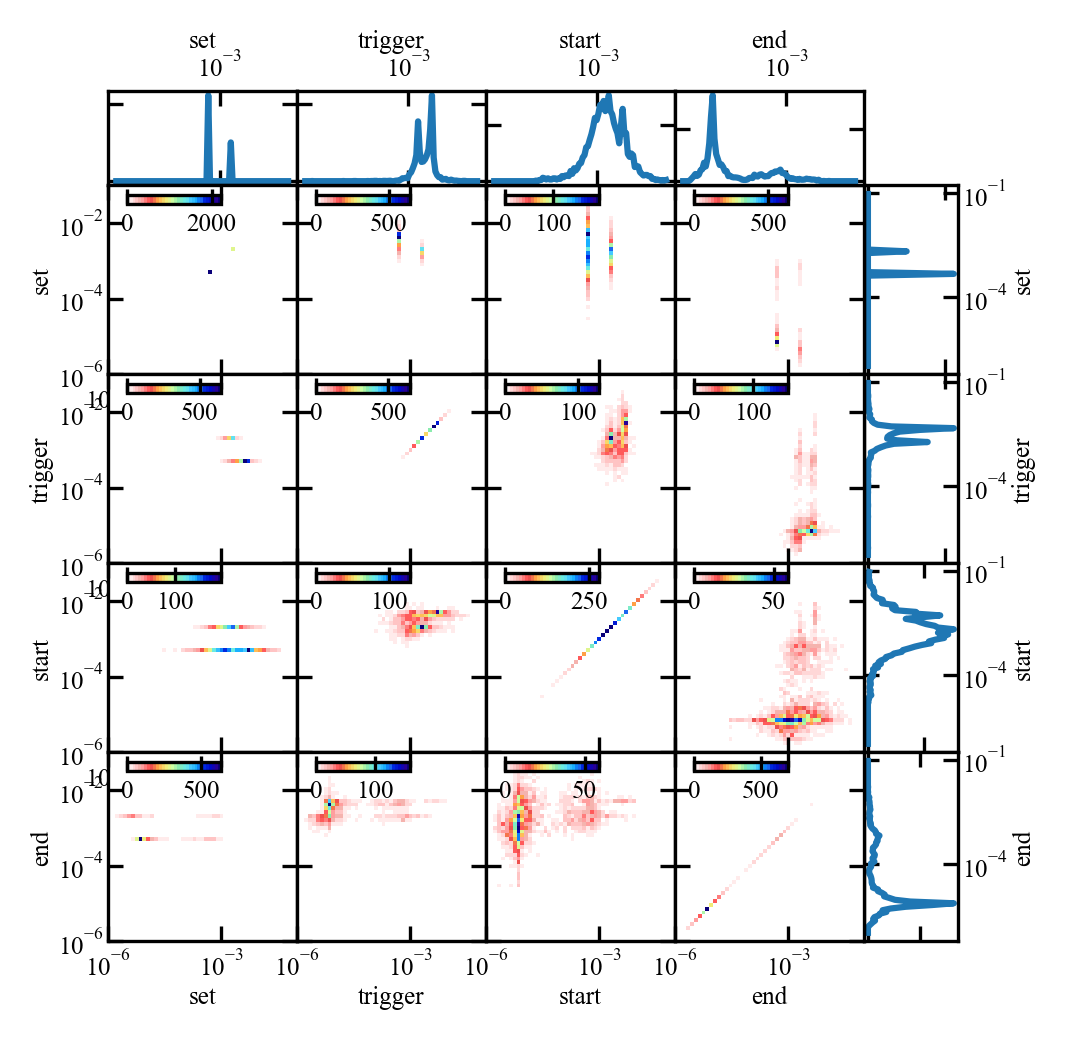

In [124]:
fig = plt.figure(figsize=utils.cm2inch(9, 9), dpi=300)
gs = plt.GridSpec(5, 5, figure=fig,
                  left=0.1, right=0.9, top=0.9, bottom=0.1,
                  height_ratios=(1, 2, 2, 2, 2), width_ratios=(2, 2, 2, 2, 1),
                  hspace=0, wspace=0)

ax_hists_top = {}
ax_hists_right = {}
ax_scats = {}
for i, coli in enumerate(pull_df.columns[1:]):
    ax_hists_top[coli] = fig.add_subplot(gs[0, i])
    ax_hists_right[coli] = fig.add_subplot(gs[i+1, 4])
    
    ax_hists_top[coli].tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=False, labelright=False, labeltop=True, labelbottom=False)
    ax_hists_right[coli].tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=False, labelright=True, labeltop=False, labelbottom=False)
    
    ax_hists_top[coli].xaxis.set_label_position('top')
    ax_hists_top[coli].set_xlabel(coli)
    ax_hists_right[coli].yaxis.set_label_position('right')
    ax_hists_right[coli].set_ylabel(coli)
    
    xbins, hist = utils.calc_hist_1d_single(data=pull_df[coli], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    ax_hists_top[coli].plot(xbins, hist, label=coli)
    ax_hists_top[coli].set_xscale('log')
    
    ax_hists_right[coli].plot(hist, xbins, label=coli)
    ax_hists_right[coli].set_yscale('log')
    
    for j, colj in enumerate(pull_df.columns[1:]):
        ax_scats[(coli, colj)] = fig.add_subplot(gs[i+1, j])
        
        ax_scats[(coli, colj)] = heatmap_from_source(df=pull_df, x=coli, y=colj,
                                                     ax=ax_scats[(coli, colj)], log_scale=True, num_bins=(50, 50),
                                                     xrange=(1e-6, 1e-1), yrange=(1e-6, 1e-1))
        
        if j==0:
            ax_scats[(coli, colj)].set_ylabel(coli)
            if i == 3:
                ax_scats[(coli, colj)].tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
                ax_scats[(coli, colj)].set_xlabel(colj)
            else:
                ax_scats[(coli, colj)].tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=True, labelright=False, labeltop=False, labelbottom=True)
                
        else:
            if i== 3:
                ax_scats[(coli, colj)].set_xlabel(colj)
            ax_scats[(coli, colj)].tick_params(which='both', left=True, right=True, top=True, bottom=True, labelleft=False, labelright=False, labeltop=False, labelbottom=True)

### IV measurements -1V-1V 
3701-4702

In [176]:
trace_pair = TracePair(3702, load_from=home_folder)  # just so we have the value of trace_pair.R_serial

In [165]:
filter_these_conditions = (filter_traces.does_not_break_array,
                           filter_traces.conductances_close,
                           filter_traces.ivs_close)

filter_with_arguments = ({},
                         {'max_ratio': 1.5, 'plateaus': (2, 10)},
                         {'max_diff' : 0.5, 'smoothing': 20})

pull_hold_iv_1, push_hold_iv_1 = filter_traces.filter_hold(folder=home_folder,
                                                           filter_condition=filter_traces.filter_multiple_conditions,
                                                           filter_conditions=filter_these_conditions,
                                                           filter_kwargs=filter_with_arguments,
                                                           start_trace=3701, end_trace=4702, min_step_len=6_000, min_height=1, r_serial_ohm=trace_pair.R_serial, iv=0)

  0%|          | 0/1002 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:2432: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2429: MeasurementOverflow: Current overflow during I(V) cycle, in pull direction.
  warnings.warn('Current overflow during I(V) cycle, in pull direction.', MeasurementOverflow)


In [166]:
print(f'Selected traces:\n|\tpull\t|\t{pull_hold_iv_1.shape[0]}\t|\t{round(pull_hold_iv_1.shape[0]/(4702-3701+1)*100, 2)}%\t|\n|\tpush\t|\t{push_hold_iv_1.shape[0]}\t|\t{round(push_hold_iv_1.shape[0]/(4702-3701+1)*100, 2)}%\t|')

Selected traces:
|	pull	|	20	|	2.0%	|
|	push	|	93	|	9.28%	|


In [44]:
np.save(home_folder.joinpath('results/pull_hold_iv_1.npy'), pull_hold_iv_1)
np.save(home_folder.joinpath('results/push_hold_iv_1.npy'), push_hold_iv_1)

In [167]:
which_trace_pull = pull_hold_iv_1[1]
print(pull_hold_iv_1.shape)
print(which_trace_pull)
trace_pair_pull = TracePair(which_trace_pull, load_from=home_folder)

hold_trace_pull = HoldTrace(which_trace_pull, load_from=home_folder,
                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

hold_trace_pull.analyse_hold_trace(num_of_fft=1)

(20,)
3741


In [168]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [241]:
which_trace = push_hold_iv_1[4]

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace = HoldTrace(which_trace, load_from=home_folder,
                        bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                        sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

hold_trace.analyse_hold_trace(num_of_fft=1)
print(trace_pair.trace_num)

3764


Text(0, 0.5, 'Bias [V]')

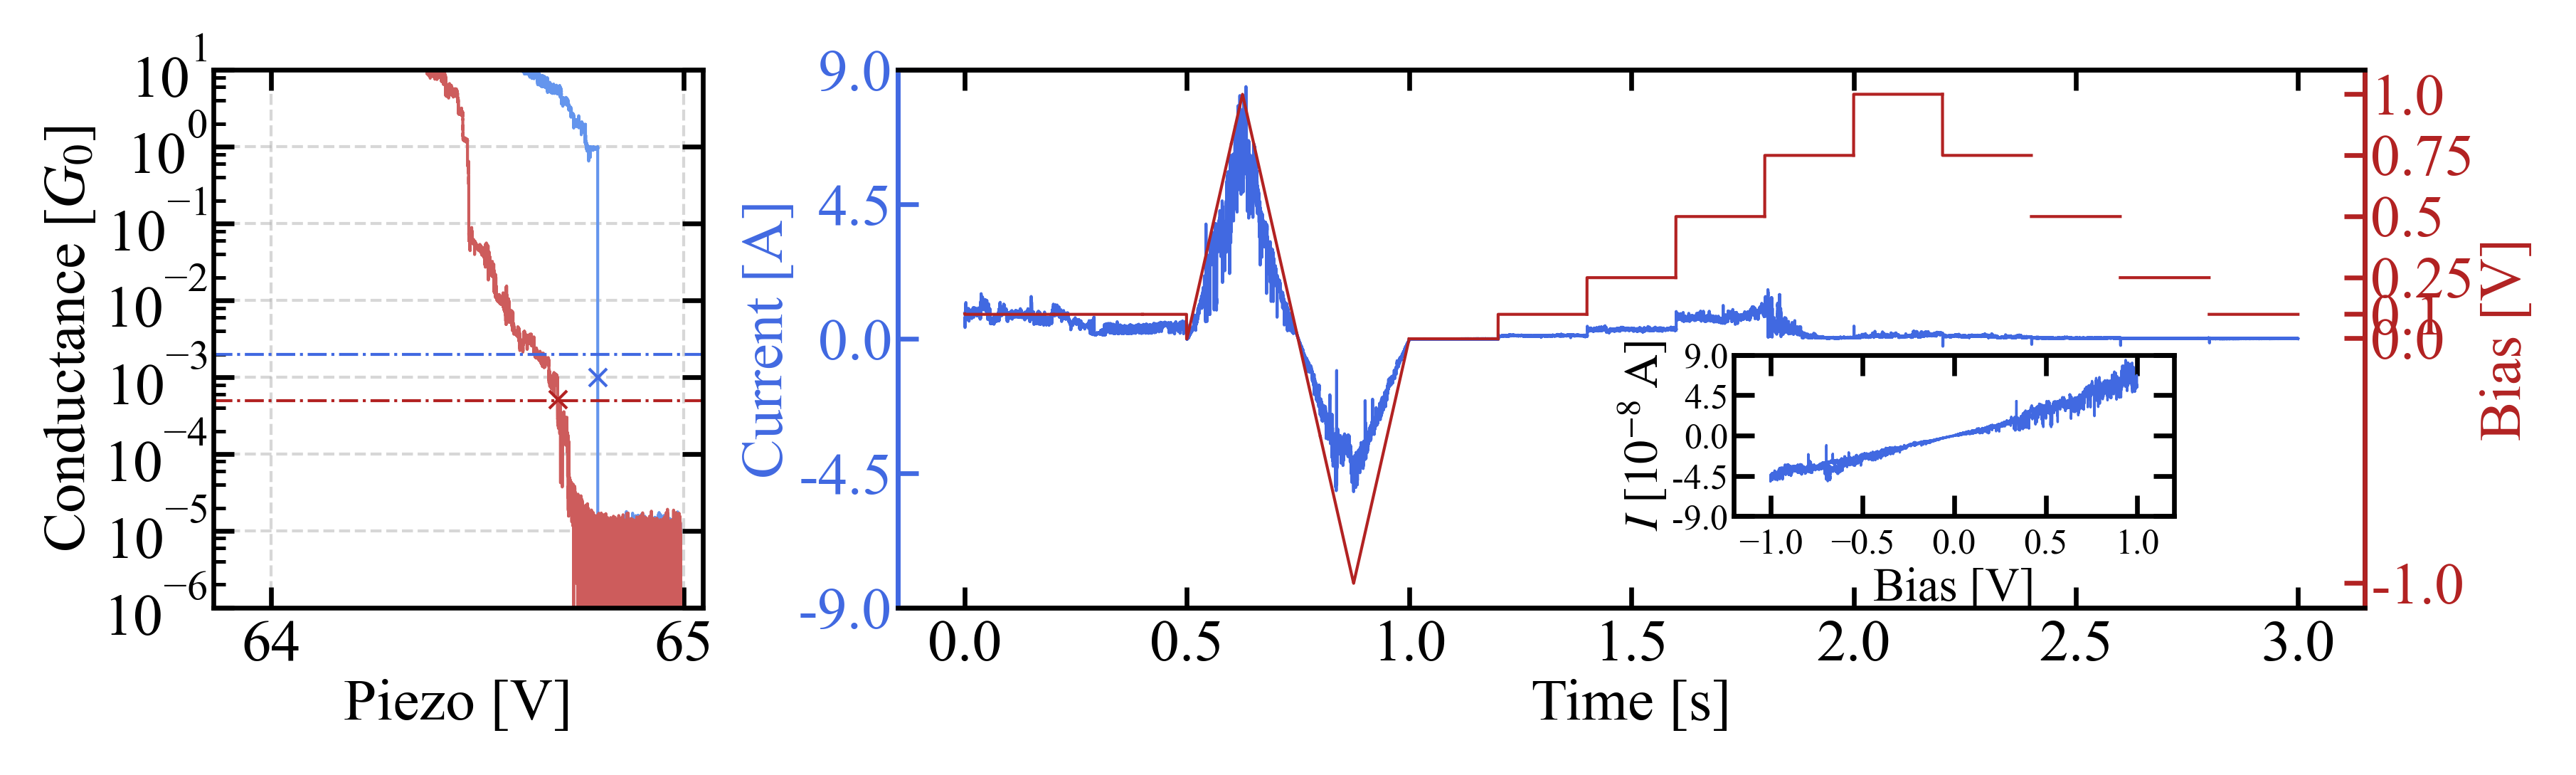

In [242]:
fig = plt.figure(figsize=utils.cm2inch(16, 4), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 3),
                       figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.15)

ax_trace = fig.add_subplot(gs[0])
ax_hold = fig.add_subplot(gs[1])

w = 0.3
smoothing=1
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('royalblue', 'firebrick')
vline_color = 'grey'

ax_iv = ax_hold.inset_axes([0.57, 0.17, w, 0.3],
                           xlim=(-1.2, 1.2))

ax_trace.tick_params(left=True, right=True, bottom=True, top=True,
                      labelleft=True, labelbottom=True, labelright=False, labeltop=False)
ax_hold.tick_params(left=True, right=True, bottom=True, top=True,
                     labelleft=False, labelbottom=True, labelright=True, labeltop=False)
ax_iv.tick_params(left=True, right=True, bottom=True, top=True,
                   labelleft=True, labelbottom=True, labelright=False, labeltop=False)

ax_trace = trace_pair.plot_trace_pair(ax=ax_trace, xlim=None,
                                      main_colors=main_colors,
                                      accent_colors=accent_colors,
                                      smoothing=smoothing, plot_trigger=True)
# ax_trace.set_xlim(65, 65.5)

iv_current = hold_trace.iv_current_pull
iv_bias = hold_trace.iv_bias_pull
iv_num_xticks=5

ax_iv.plot(utils.moving_average(iv_bias, smoothing),
               utils.moving_average(iv_current, smoothing),
               c=accent_colors[0], lw=0.4)

max_curr = max(abs(iv_current))

ax_iv.set_ylim(-1 * max_curr, max_curr)
ax_iv.set_yticks(np.linspace(-1 * np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)),
                             np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)), num=5)
                 * 10 ** utils.get_exponent(max_curr))
ax_iv.set_yticklabels(np.linspace(-1 * np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)),
                                  np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)), num=5))
ax_iv.set_xticks(np.linspace(np.round(min(hold_trace.iv_bias_pull)), np.round(max(hold_trace.iv_bias_pull)),
                             num=iv_num_xticks))

ax_iv.tick_params(axis='both', which='major', labelsize=6)

ax_iv.set_xlabel('Bias [V]', fontsize=8)
if utils.get_exponent(max_curr) == -6:
    ax_hold.set_ylabel(r'$I$ [$10^{-6}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-6}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -7:
    ax_hold.set_ylabel(r'$I$ [$10^{-7}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-7}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -8:
    ax_hold.set_ylabel(r'$I$ [$10^{-8}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-8}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -9:
    ax_hold.set_ylabel(r'$I$ [$10^{-9}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-9}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -10:
    ax_hold.set_ylabel(r'$I$ [$10^{-10}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-10}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -5:
    ax_hold.set_ylabel(r'$I$ [$10^{-5}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-5}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -4:
    ax_hold.set_ylabel(r'$I$ [$10^{-4}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-4}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
else:
    raise UserWarning(f'No axis label defined for this case. Refer to plots.py line 681, to add a label'
                      f'for the case when utils.get_exponent(max_curr) = {utils.get_exponent(max_curr)}')
    
ax_hold, par_hold = hold_trace.plot_hold_traces(direction='pull',
                                                plot_step_ranges=False,
                                                plot_psd_intervals=False,
                                                conductance=False,
                                                ax=ax_hold, log_scale_y=False,
                                                ax_colors=accent_colors,
                                                smoothing=smoothing)

ax_hold.set_ylim(-1 * max_curr, max_curr)
ax_hold.set_yticks(np.linspace(-1*np.ceil(max_curr/10**utils.get_exponent(max_curr)),
                               np.ceil(max_curr/10**utils.get_exponent(max_curr)), num=5)
                   * 10**utils.get_exponent(max_curr))
ax_hold.set_yticklabels(np.linspace(-1*np.ceil(max_curr/10**utils.get_exponent(max_curr)),
                                    np.ceil(max_curr/10**utils.get_exponent(max_curr)), num=5))

# ax_hold.axvspan(

par_hold.set_yticks(np.array([-1000, 0, 100, 250, 500, 750, 1000])/1000)
par_hold.set_yticklabels(np.array([-1000, 0, 100, 250, 500, 750, 1000])/1000)
par_hold.set_ylabel('Bias [V]')

Text(0, 0.5, 'Bias [V]')

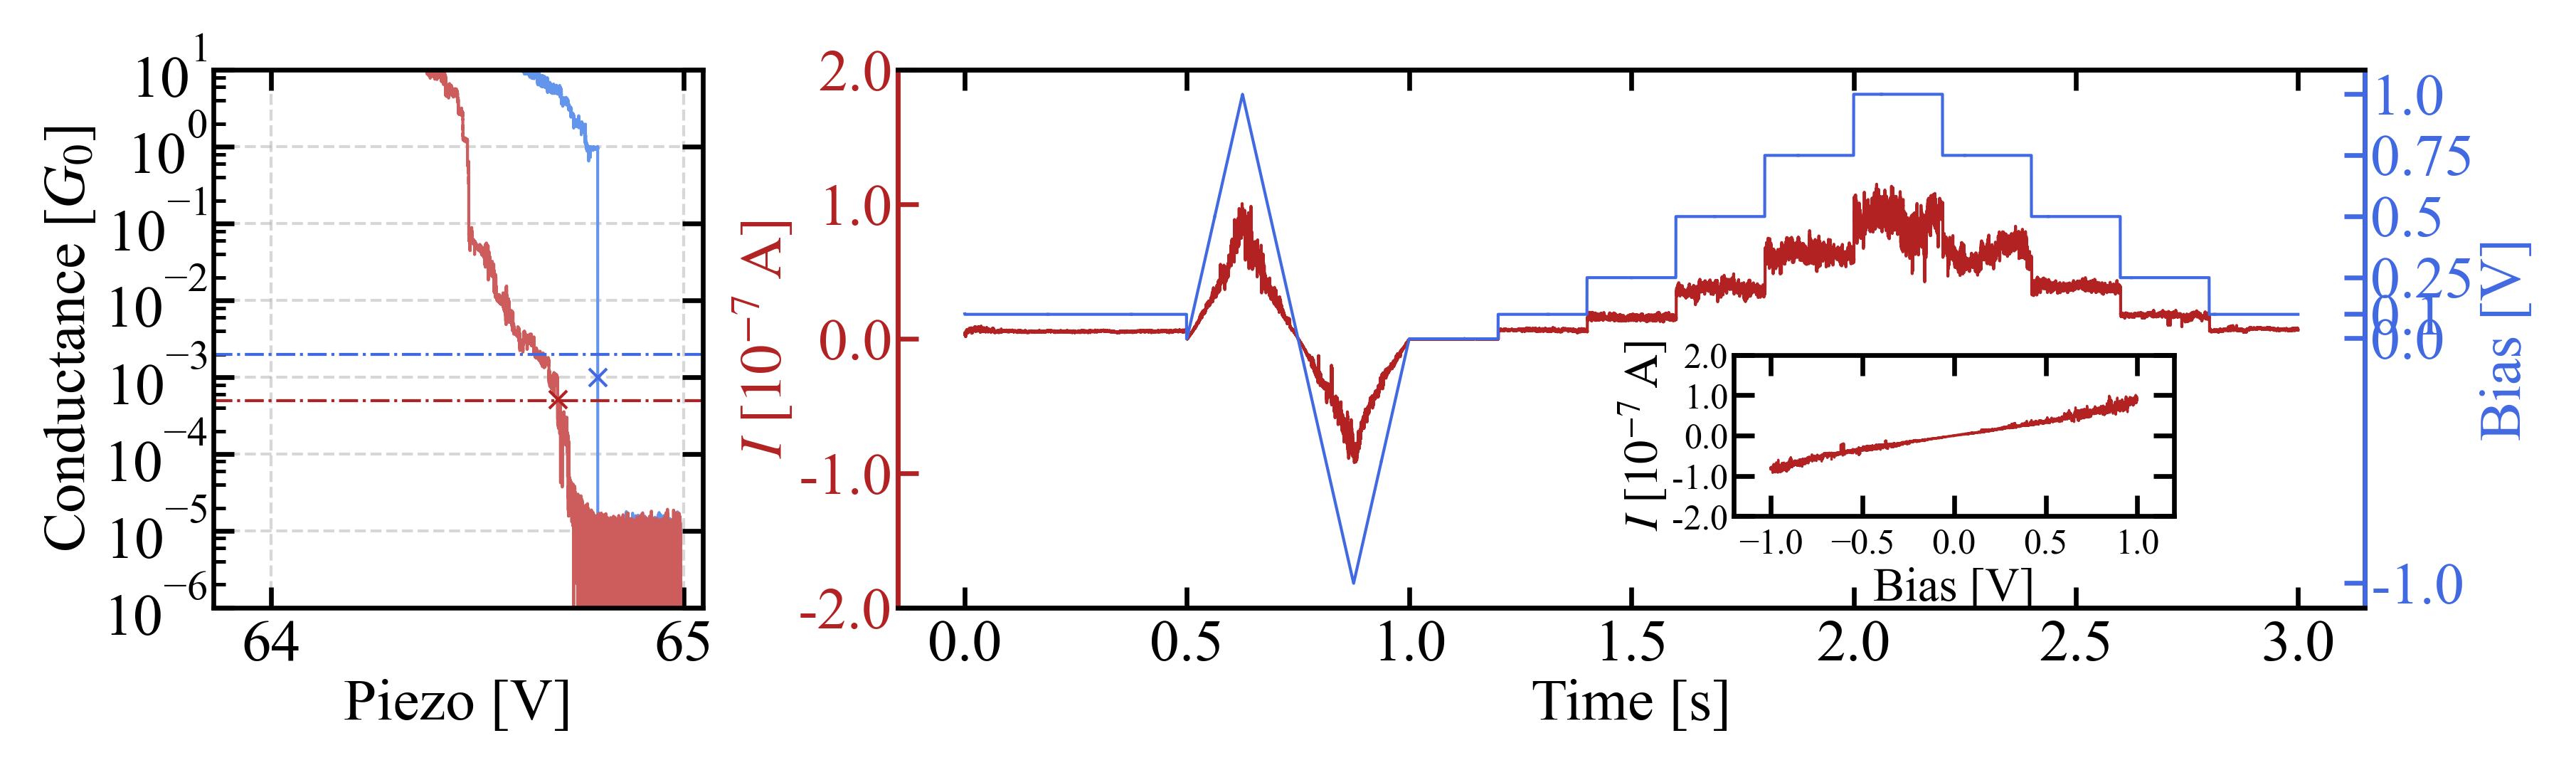

In [244]:
fig = plt.figure(figsize=utils.cm2inch(16, 4), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 3),
                       figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.15)

ax_trace = fig.add_subplot(gs[0])
ax_hold = fig.add_subplot(gs[1])

w = 0.3
smoothing=1
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('royalblue', 'firebrick')
vline_color = 'grey'

ax_iv = ax_hold.inset_axes([0.57, 0.17, w, 0.3],
                           xlim=(-1.2, 1.2))

ax_trace.tick_params(left=True, right=True, bottom=True, top=True,
                      labelleft=True, labelbottom=True, labelright=False, labeltop=False)
ax_hold.tick_params(left=True, right=True, bottom=True, top=True,
                     labelleft=False, labelbottom=True, labelright=True, labeltop=False)
ax_iv.tick_params(left=True, right=True, bottom=True, top=True,
                   labelleft=True, labelbottom=True, labelright=False, labeltop=False)

ax_trace = trace_pair.plot_trace_pair(ax=ax_trace, xlim=None,
                                      main_colors=main_colors,
                                      accent_colors=accent_colors,
                                      smoothing=smoothing, plot_trigger=True)
# ax_trace.set_xlim(65, 65.5)

iv_current = hold_trace.iv_current_push
iv_bias = hold_trace.iv_bias_push
iv_num_xticks=5

ax_iv.plot(utils.moving_average(iv_bias, smoothing),
               utils.moving_average(iv_current, smoothing),
               c=accent_colors[1], lw=0.4)

max_curr = max(abs(iv_current))

ax_iv.set_ylim(-1 * max_curr, max_curr)
ax_iv.set_yticks(np.linspace(-1 * np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)),
                             np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)), num=5)
                 * 10 ** utils.get_exponent(max_curr))
ax_iv.set_yticklabels(np.linspace(-1 * np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)),
                                  np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)), num=5))
ax_iv.set_xticks(np.linspace(np.round(min(hold_trace.iv_bias_push)), np.round(max(hold_trace.iv_bias_push)),
                             num=iv_num_xticks))

ax_iv.tick_params(axis='both', which='major', labelsize=6)

ax_hold, par_hold = hold_trace.plot_hold_traces(direction='push',
                                                plot_step_ranges=False,
                                                plot_psd_intervals=False,
                                                conductance=False,
                                                ax=ax_hold, log_scale_y=False,
                                                ax_colors=accent_colors,
                                                smoothing=smoothing)

ax_iv.set_xlabel('Bias [V]', fontsize=8)
if utils.get_exponent(max_curr) == -6:
    ax_hold.set_ylabel(r'$I$ [$10^{-6}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-6}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -7:
    ax_hold.set_ylabel(r'$I$ [$10^{-7}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-7}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -8:
    ax_hold.set_ylabel(r'$I$ [$10^{-8}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-8}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -9:
    ax_hold.set_ylabel(r'$I$ [$10^{-9}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-9}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -10:
    ax_hold.set_ylabel(r'$I$ [$10^{-10}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-10}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -5:
    ax_hold.set_ylabel(r'$I$ [$10^{-5}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-5}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
elif utils.get_exponent(max_curr) == -4:
    ax_hold.set_ylabel(r'$I$ [$10^{-4}\;\mathrm{A}$]', labelpad=0.5)
    ax_iv.set_ylabel(r'$I$ [$10^{-4}\;\mathrm{A}$]', labelpad=0.5, fontsize=8)
else:
    raise UserWarning(f'No axis label defined for this case. Refer to plots.py line 681, to add a label'
                      f'for the case when utils.get_exponent(max_curr) = {utils.get_exponent(max_curr)}')
    


ax_hold.set_ylim(-1 * max_curr, max_curr)
ax_hold.set_yticks(np.linspace(-1*np.ceil(max_curr/10**utils.get_exponent(max_curr)),
                               np.ceil(max_curr/10**utils.get_exponent(max_curr)), num=5)
                   * 10**utils.get_exponent(max_curr))
ax_hold.set_yticklabels(np.linspace(-1*np.ceil(max_curr/10**utils.get_exponent(max_curr)),
                                    np.ceil(max_curr/10**utils.get_exponent(max_curr)), num=5))

# ax_hold.axvspan(

par_hold.set_yticks(np.array([-1000, 0, 100, 250, 500, 750, 1000])/1000)
par_hold.set_yticklabels(np.array([-1000, 0, 100, 250, 500, 750, 1000])/1000)
par_hold.set_ylabel('Bias [V]')

(<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>,
 <AxesSubplot:xlabel='Time [s]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <AxesSubplot:xlabel='Bias [V]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I^2 [\\mathrm{A}^2]$'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I/I$'>,
 <AxesSubplot:xlabel='Frequency [Hz]', ylabel='$S_{I}\\;[\\mathrm{A}^2/\\mathrm{Hz}]$'>)

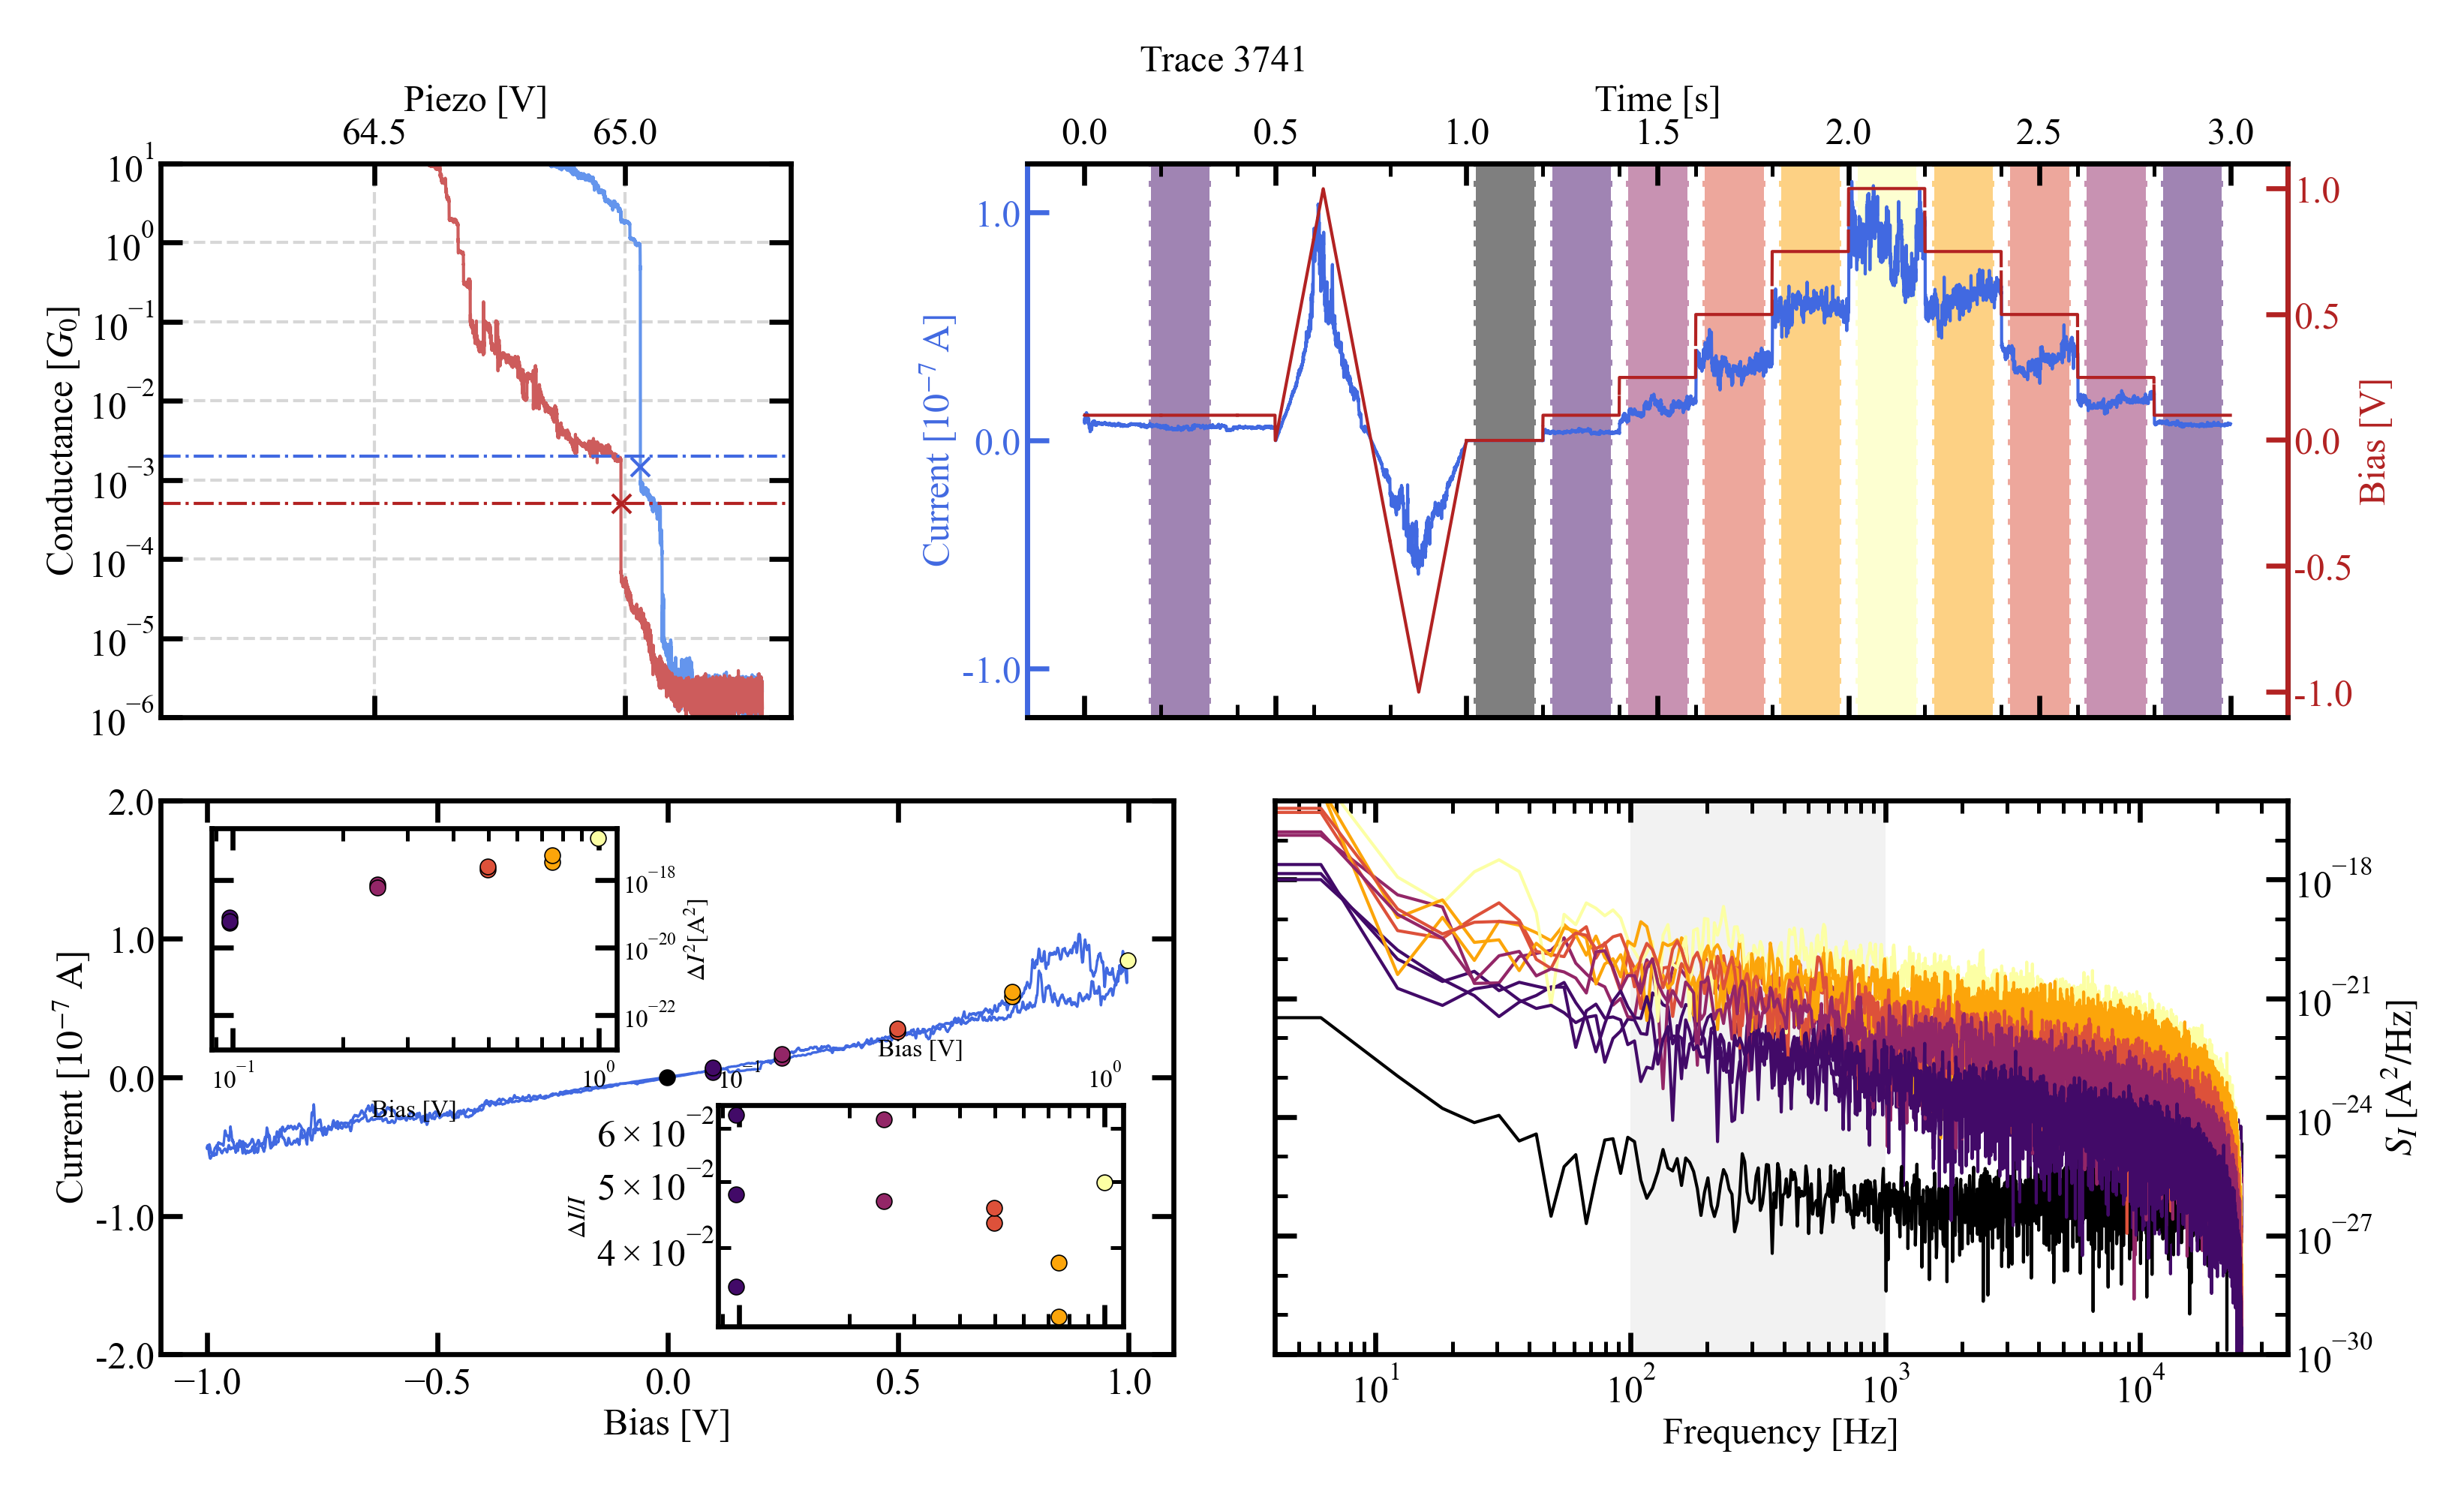

In [46]:
plots.plot_iv_with_details(hold_trace=hold_trace_pull, trace_pair=trace_pair_pull,
                           direction='pull', smoothing=20, cmap='inferno')

In [47]:
for i in range(len(hold_trace_pull.bias_steps)):
    print(hold_trace_pull.bias_steps[i], hold_trace_pull.current_noise_pull[i])

0.0981561 0.04790215186000059
-0.00185 -0.04857782501652463
0.0981561 0.06276159848744993
0.24815 0.06188483591743143
0.49815 0.04349393985702009
0.74815 0.0316194747359528
0.99815 0.04987891493139582
0.74815 0.037999353146653946
0.49815 0.045720932441064566
0.24815 0.046804092415769084
0.0981561 0.03499613274841301


(<Figure size 3543.31x1984.25 with 5 Axes>,
 <AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>,
 <AxesSubplot:xlabel='Time [s]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <AxesSubplot:ylabel='Bias [V]'>,
 <AxesSubplot:xlabel='Bias [V]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <AxesSubplot:xlabel='Frequency [Hz]', ylabel='$S_{I}\\;[\\mathrm{A}^2/\\mathrm{Hz}]$'>)

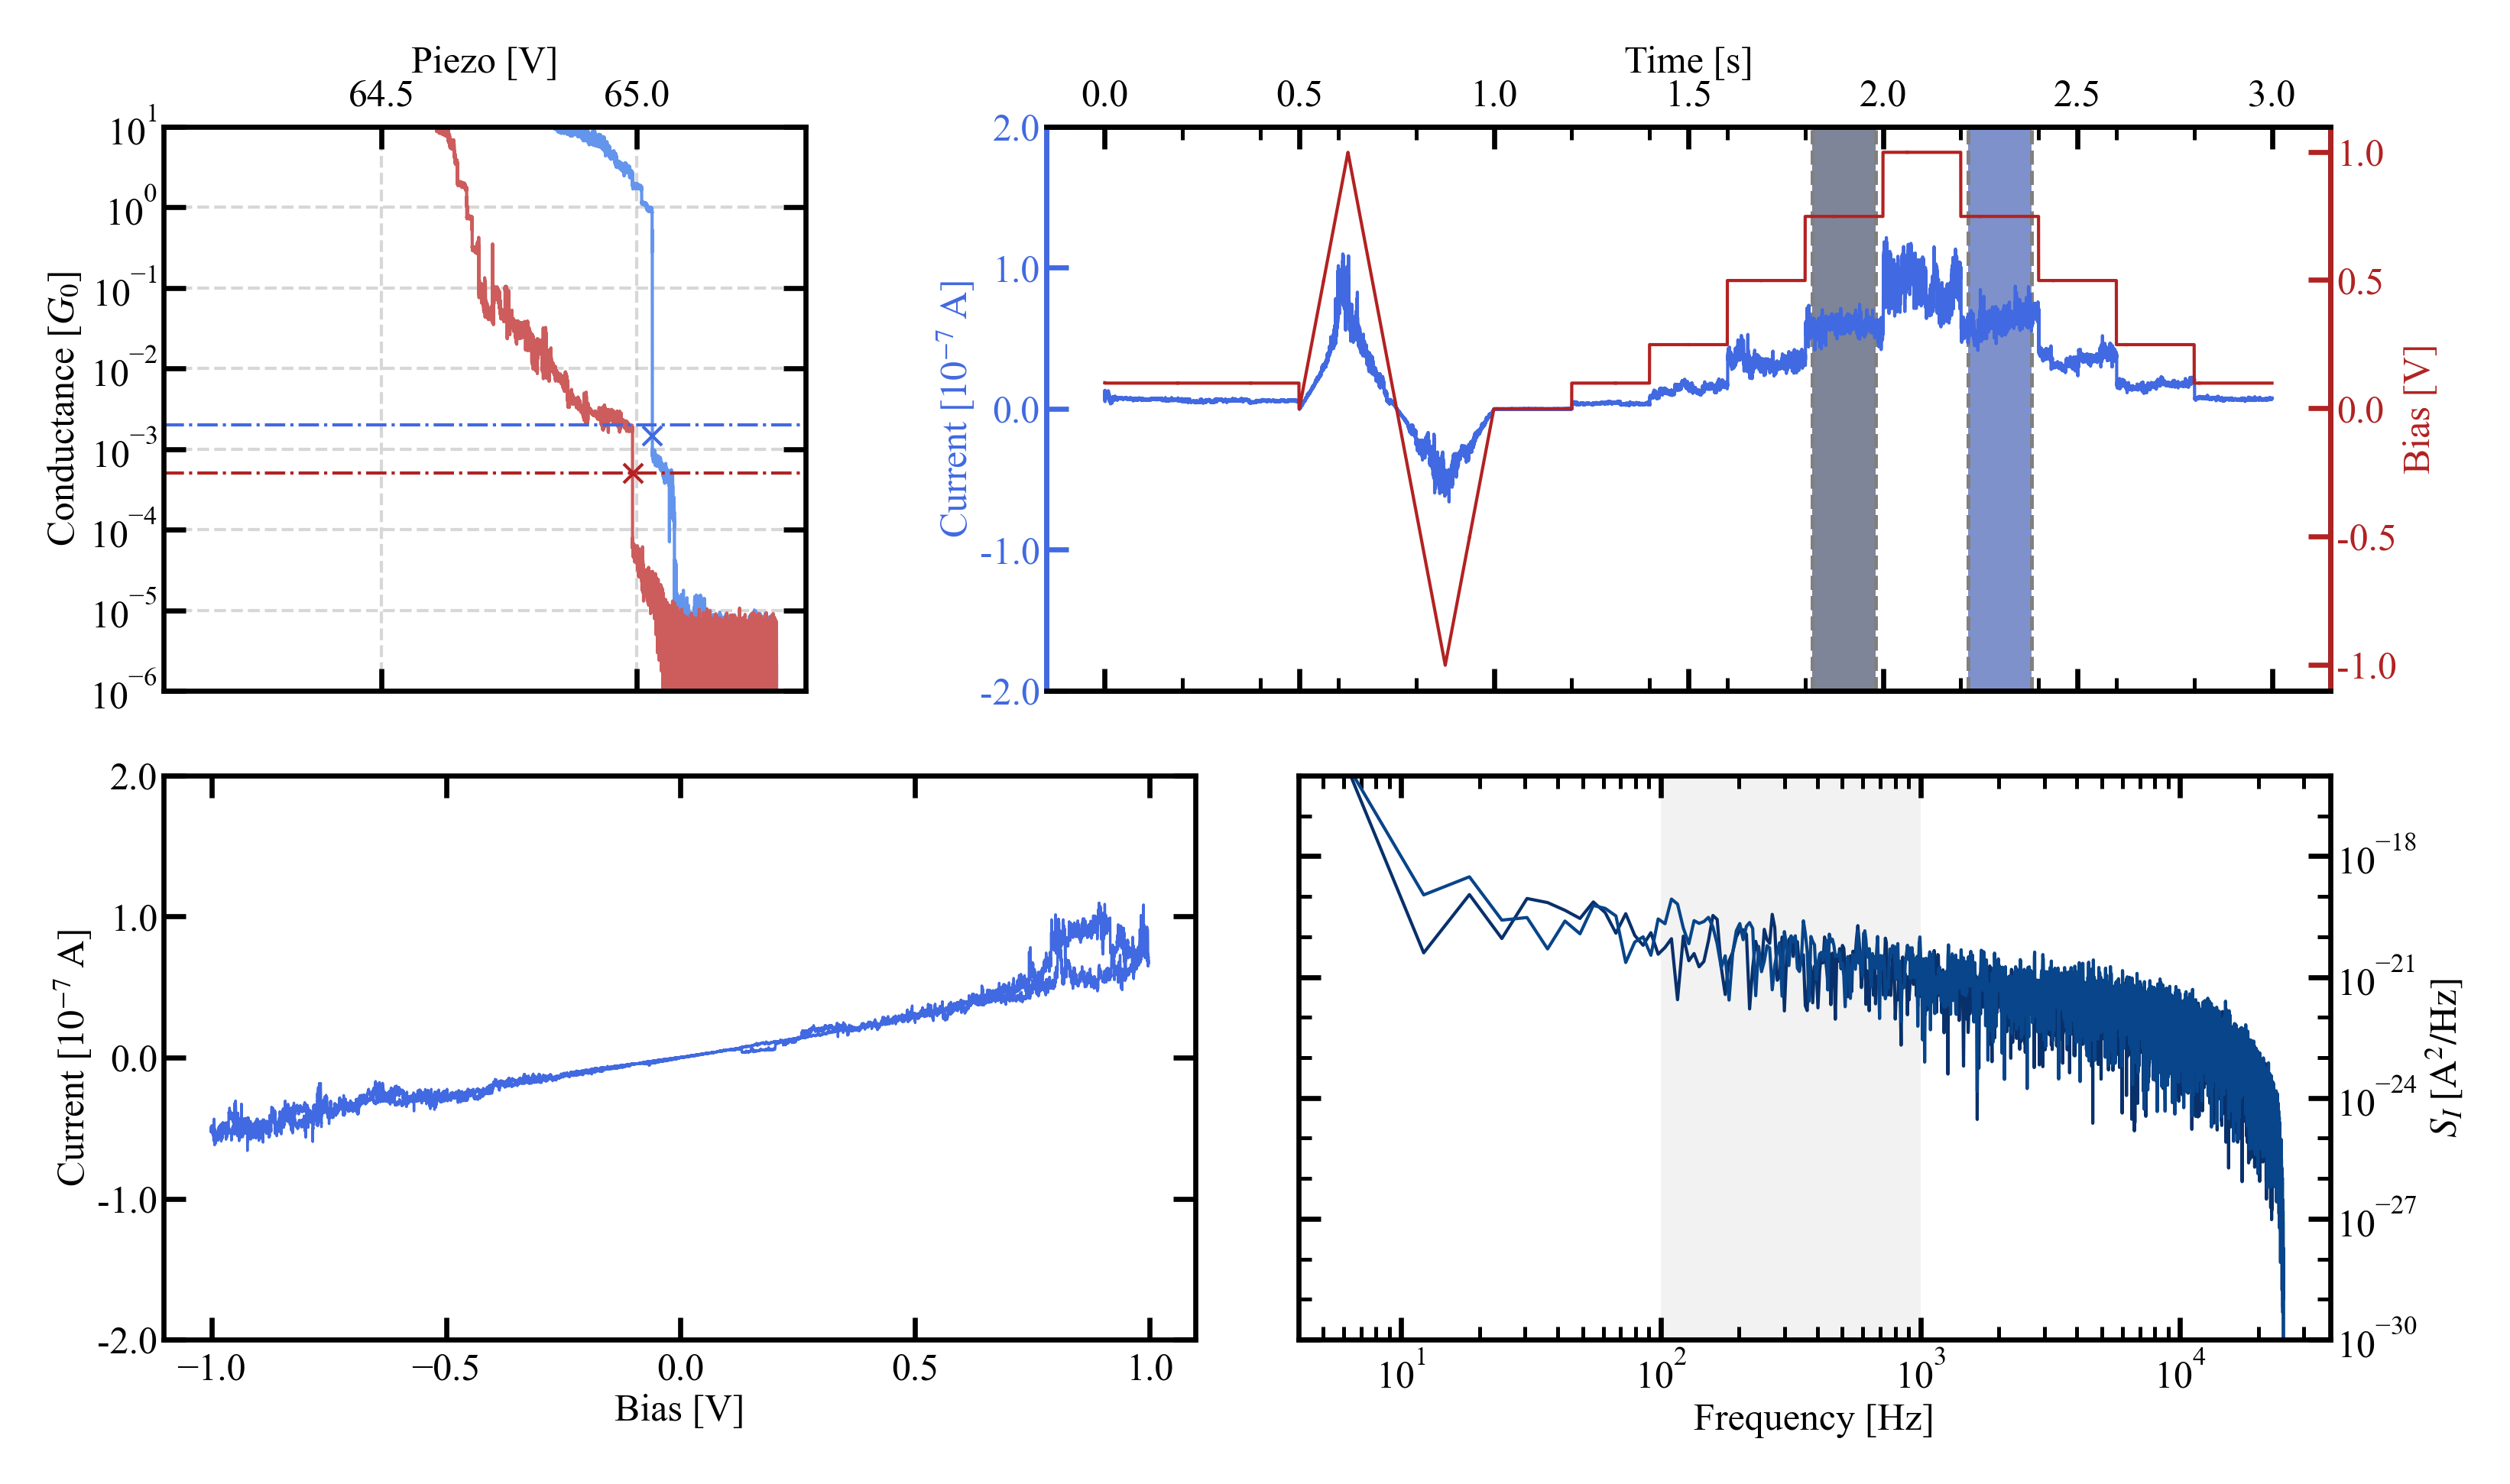

In [48]:
plots.plot_ivs_scheme_one(trace_pair_pull, hold_trace_pull,
                        direction='pull',
                        smoothing= 1,
                        which_psds=[5, 7])

In [49]:
hold_trace_pull.psds_pull

array([[3.2517096e-18, 1.4123223e-18, 9.6914775e-21, ..., 1.0669027e-25,
        8.9946623e-26, 5.6532621e-28],
       [7.5802137e-22, 3.2209875e-22, 1.0772652e-23, ..., 1.0255183e-26,
        8.0469963e-26, 4.3056937e-26],
       [1.6595948e-18, 9.9325294e-19, 1.6453710e-20, ..., 6.8558684e-27,
        7.9744762e-28, 6.5969804e-30],
       ...,
       [1.2464790e-16, 6.2990254e-17, 1.7952448e-19, ..., 4.2829884e-31,
        1.7838773e-31, 3.4465856e-31],
       [3.0246005e-17, 1.5961871e-17, 1.3145351e-19, ..., 4.1946361e-32,
        1.0770580e-32, 8.6164641e-32],
       [5.0609644e-18, 2.3923463e-18, 1.7757607e-21, ..., 6.8965501e-32,
        4.3526713e-32, 0.0000000e+00]], dtype=float32)

In [51]:
which_trace_push = push_hold_iv_1[0]
print(push_hold_iv_1.shape)
print(which_trace_push)
trace_pair_push = TracePair(which_trace_push, load_from=home_folder)

hold_trace_push = HoldTrace(which_trace_push, load_from=home_folder,
                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

hold_trace_push.analyse_hold_trace(num_of_fft=1)

(93,)
3742


(<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>,
 <AxesSubplot:xlabel='Time [s]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <AxesSubplot:xlabel='Bias [V]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I^2 [\\mathrm{A}^2]$'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I/I$'>,
 <AxesSubplot:xlabel='Frequency [Hz]', ylabel='$S_{I}\\;[\\mathrm{A}^2/\\mathrm{Hz}]$'>)

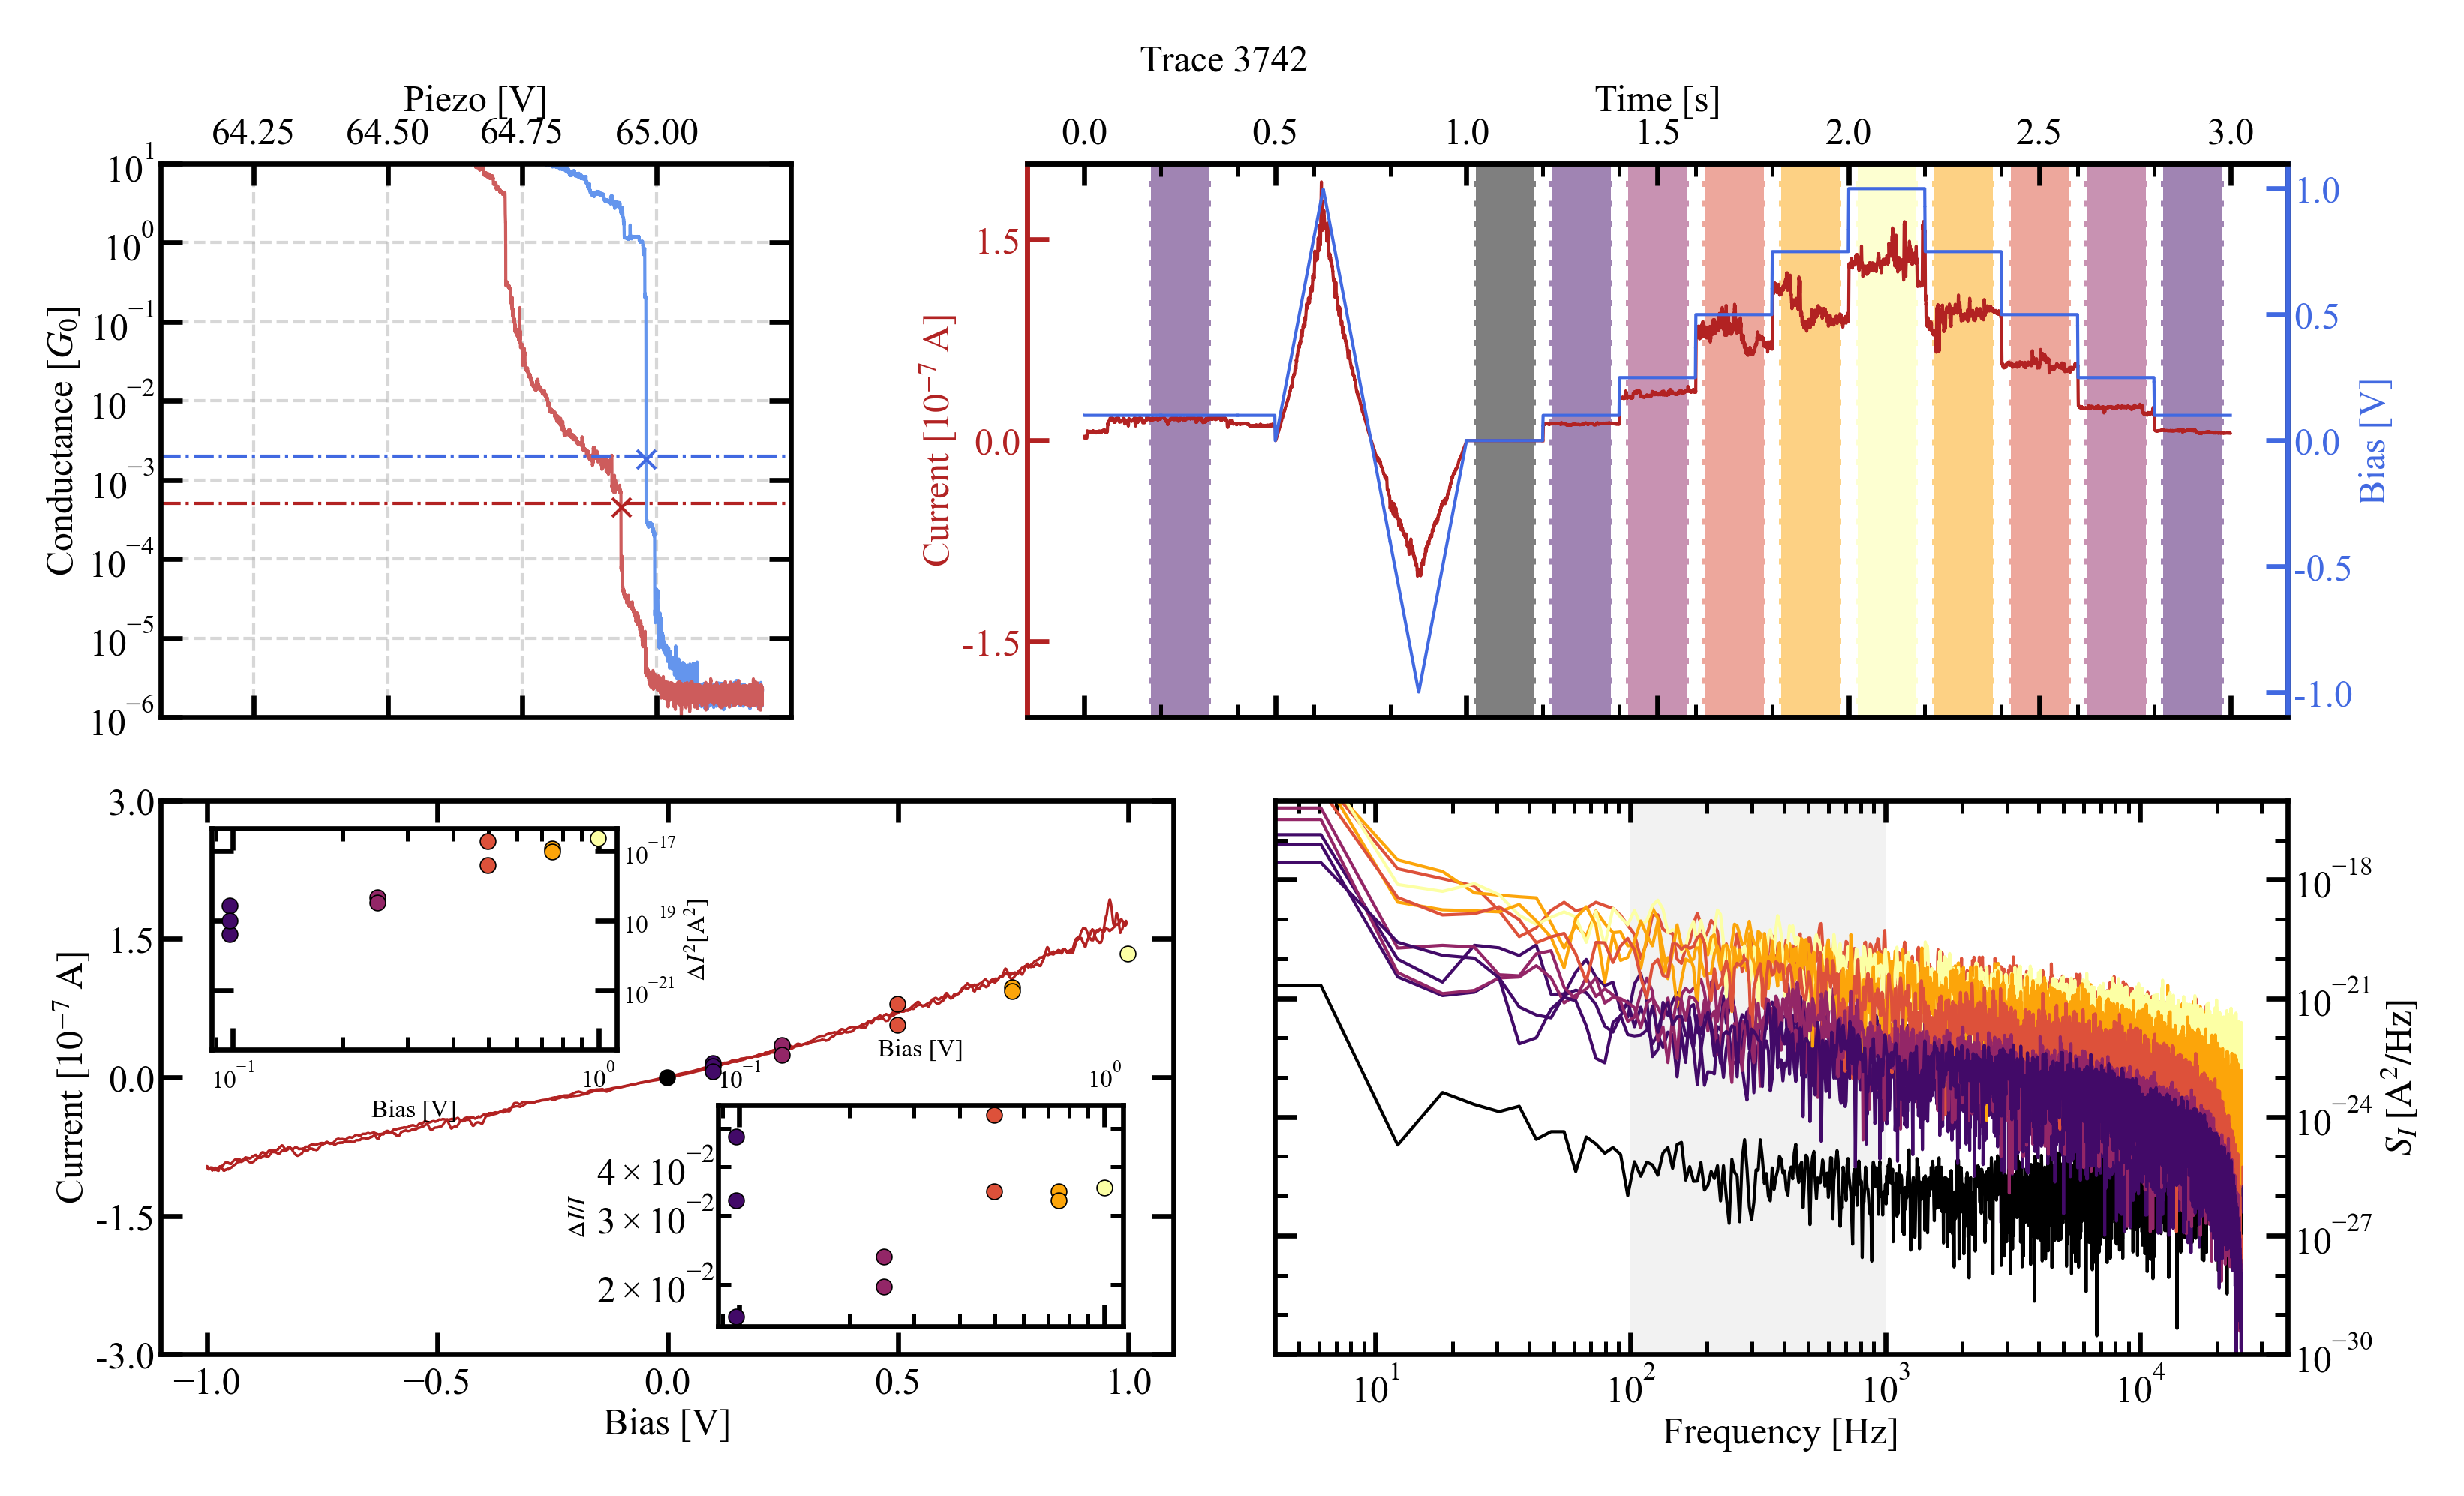

In [52]:
plots.plot_iv_with_details(hold_trace=hold_trace_push, trace_pair=trace_pair_push,
                           direction='push', smoothing=50, cmap='inferno')

### IV measurements -1V-1V 
5505-7727

In [53]:
trace_pair = TracePair(5505, load_from=home_folder)  # just so we have the value of trace_pair.R_serial

In [54]:
filter_these_conditions = (filter_traces.does_not_break_array,
                           filter_traces.conductances_close,
                           filter_traces.ivs_close)

filter_with_arguments = ({},
                         {'max_ratio': 1.5, 'plateaus': (2, 10)},
                         {'max_diff' : 0.5, 'smoothing': 20})

pull_hold_iv_2, push_hold_iv_2 = filter_traces.filter_hold(folder=home_folder,
                                                           filter_condition=filter_traces.filter_multiple_conditions,
                                                           filter_conditions=filter_these_conditions,
                                                           filter_kwargs=filter_with_arguments,
                                                           start_trace=5505, end_trace=7721, min_step_len=6_000, min_height=1, r_serial_ohm=trace_pair.R_serial, iv=0)

  0%|          | 0/2217 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:2432: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2429: MeasurementOverflow: Current overflow during I(V) cycle, in pull direction.
  warnings.warn('Current overflow during I(V) cycle, in pull direction.', MeasurementOverflow)


In [55]:
print(f'Selected traces:\n|\tpull\t|\t{pull_hold_iv_2.shape[0]}\t|\t{round(pull_hold_iv_2.shape[0]/(7721-5505+1)*100, 2)}%\t|\n|\tpush\t|\t{push_hold_iv_2.shape[0]}\t|\t{round(push_hold_iv_2.shape[0]/(7721-5505+1)*100, 2)}%\t|')

Selected traces:
|	pull	|	47	|	2.12%	|
|	push	|	331	|	14.93%	|


In [56]:
np.save(home_folder.joinpath('results/pull_hold_iv_2.npy'), pull_hold_iv_2)
np.save(home_folder.joinpath('results/push_hold_iv_2.npy'), push_hold_iv_2)

In [57]:
which_trace_pull = pull_hold_iv_2[2]
print(pull_hold_iv_2.shape)
print(which_trace_pull)
trace_pair_pull = TracePair(which_trace_pull, load_from=home_folder)

hold_trace_pull = HoldTrace(which_trace_pull, load_from=home_folder,
                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

hold_trace_pull.analyse_hold_trace(num_of_fft=1)

(47,)
5947


In [58]:
hold_trace_pull.freq_resolution

6.103515624999999

(<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>,
 <AxesSubplot:xlabel='Time [s]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <AxesSubplot:xlabel='Bias [V]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I^2 [\\mathrm{A}^2]$'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I/I$'>,
 <AxesSubplot:xlabel='Frequency [Hz]', ylabel='$S_{I}\\;[\\mathrm{A}^2/\\mathrm{Hz}]$'>)

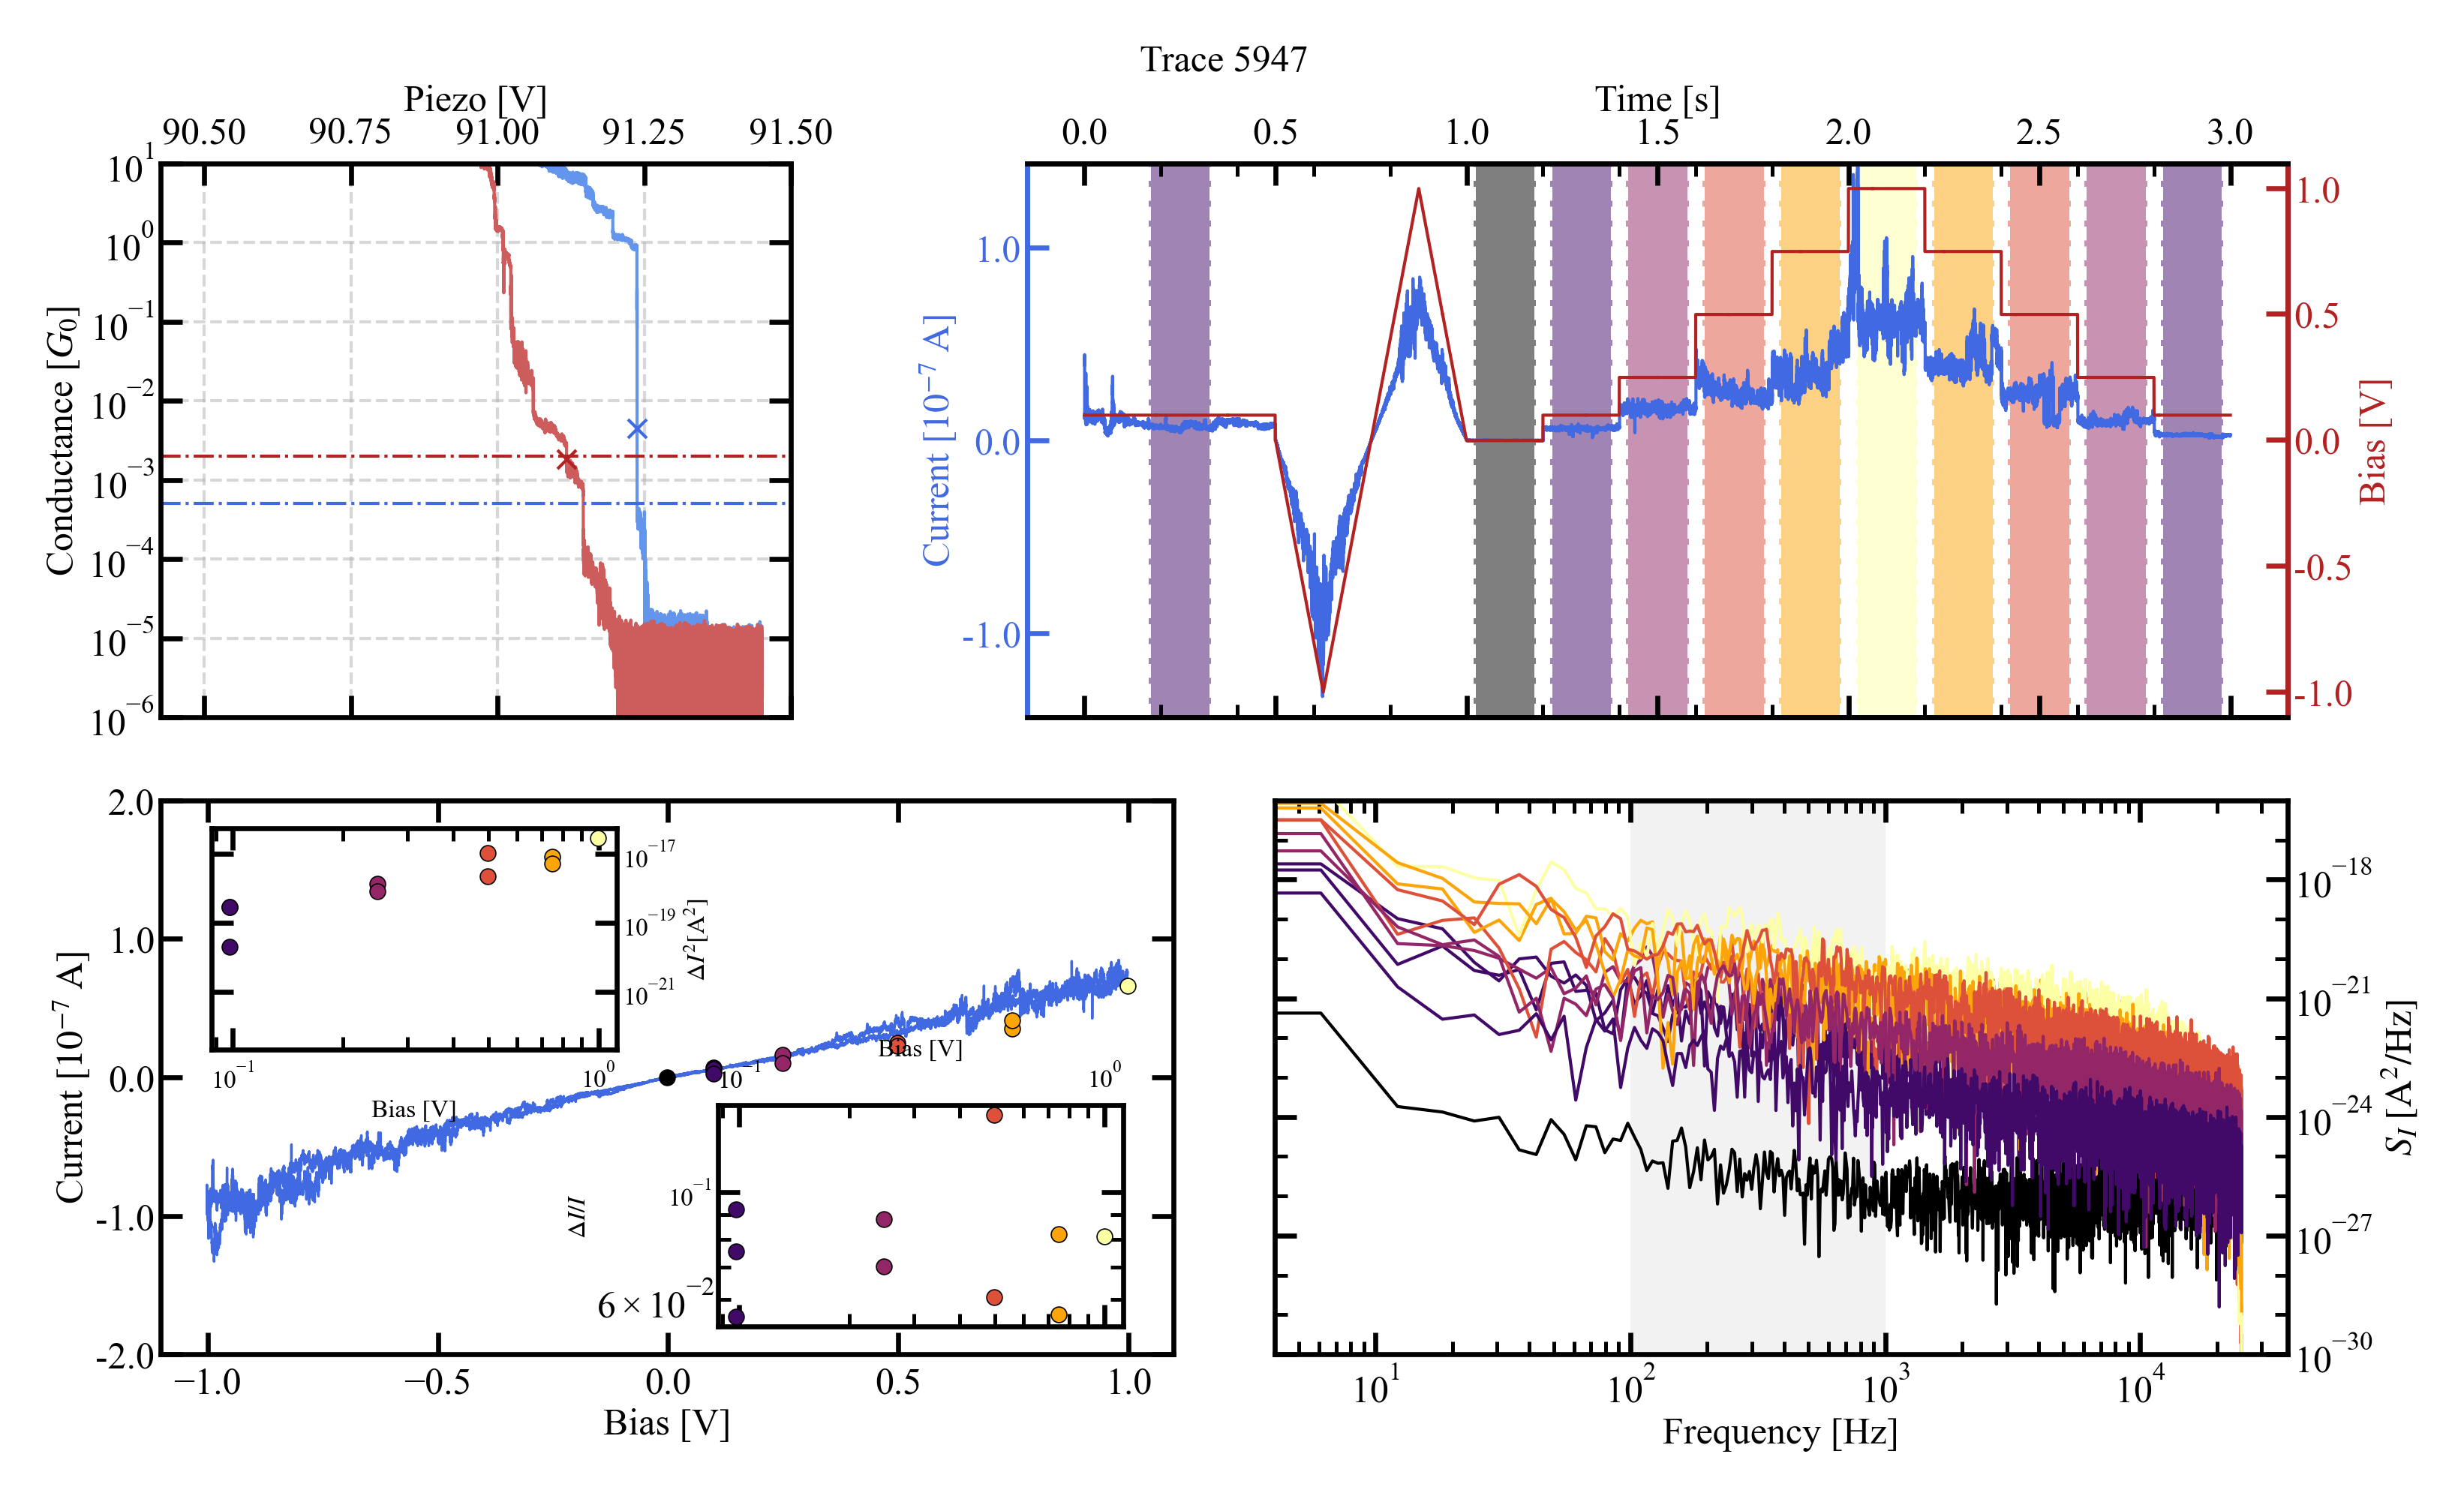

In [59]:
plots.plot_iv_with_details(hold_trace=hold_trace_pull, trace_pair=trace_pair_pull,
                           direction='pull', smoothing=1, cmap='inferno')

In [60]:
which_trace_push = push_hold_iv_2[2]
print(push_hold_iv_2.shape)
print(which_trace_push)
trace_pair_push = TracePair(which_trace_push, load_from=home_folder)

hold_trace_push = HoldTrace(which_trace_push, load_from=home_folder,
                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

hold_trace_push.analyse_hold_trace(num_of_fft=1)

(331,)
5519


(<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>,
 <AxesSubplot:xlabel='Time [s]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <AxesSubplot:xlabel='Bias [V]', ylabel='Current [$10^{-7}\\;\\mathrm{A}$]'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I^2 [\\mathrm{A}^2]$'>,
 <Axes:label='inset_axes', xlabel='Bias [V]', ylabel='$\\Delta I/I$'>,
 <AxesSubplot:xlabel='Frequency [Hz]', ylabel='$S_{I}\\;[\\mathrm{A}^2/\\mathrm{Hz}]$'>)

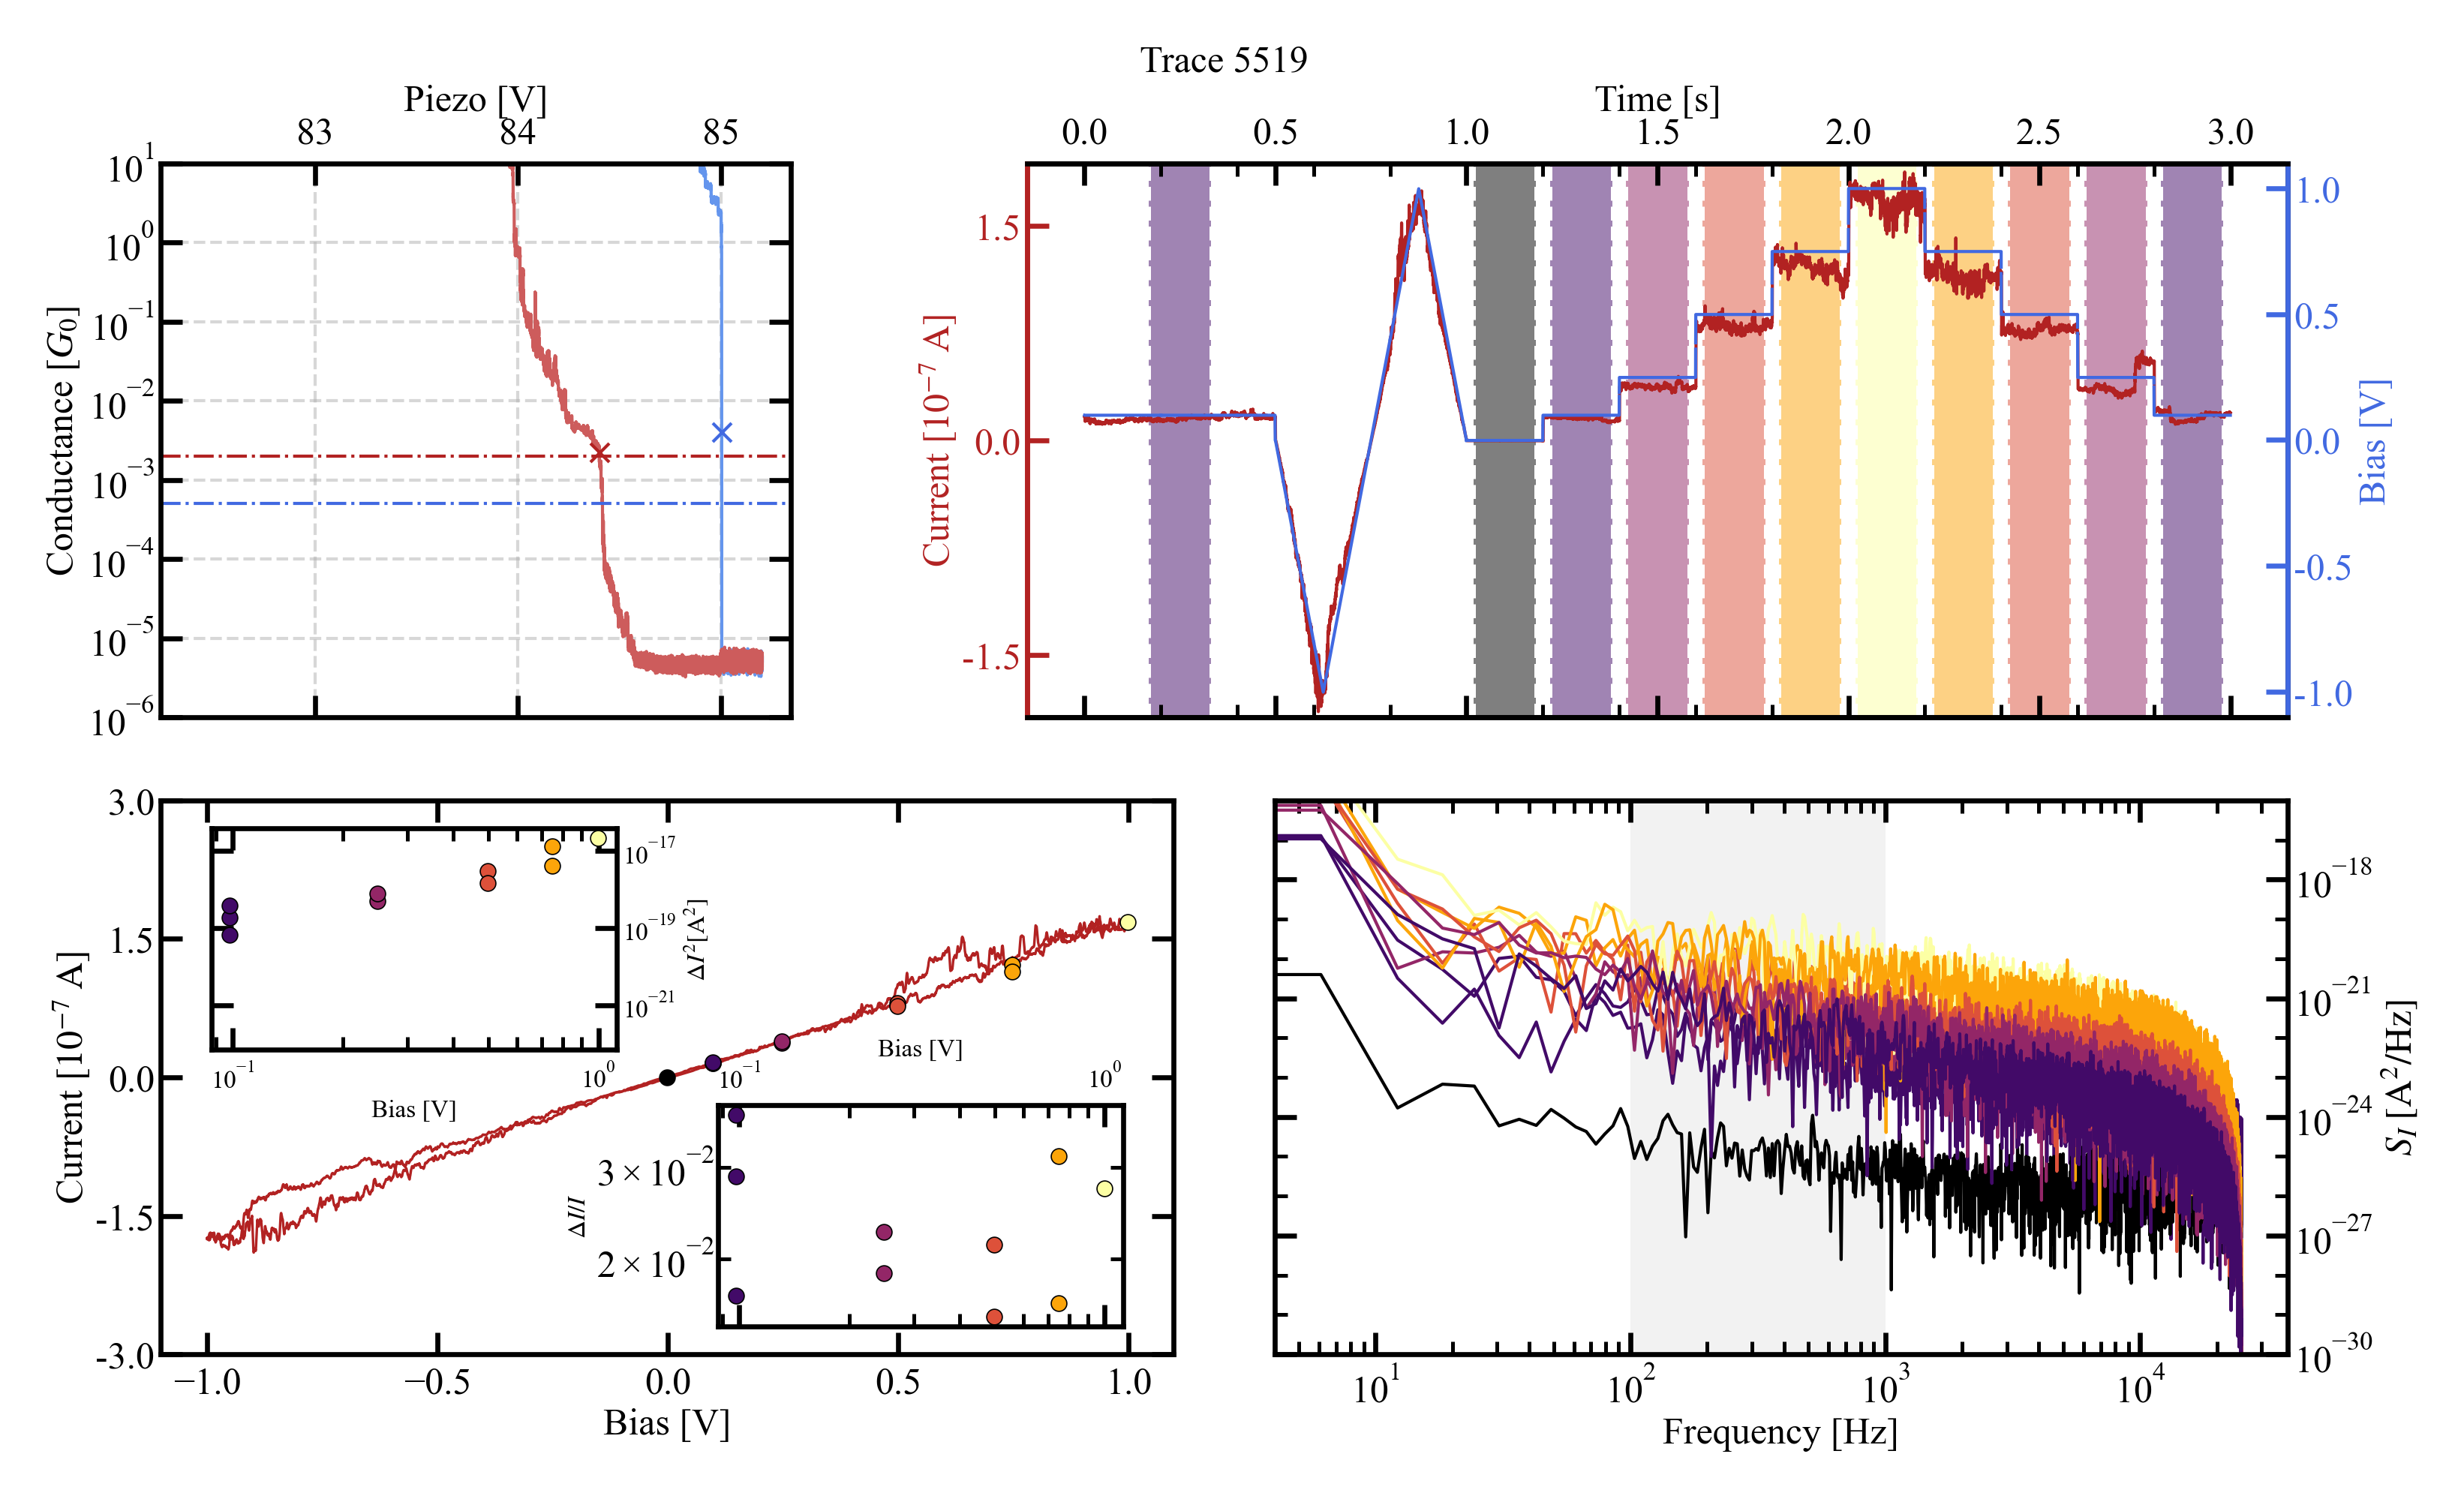

In [62]:
plots.plot_iv_with_details(hold_trace=hold_trace_push, trace_pair=trace_pair_push,
                           direction='push', smoothing=20, cmap='inferno')

## Saving the results

After this analysis, run `plotter_script.py` in the terminal, to save the filtered traces for Laci's theoretical simulation analysis and to save the figures for all selected I(V)s. To run this script, you need to change the following parameters:

`date` : change to the date of the measurement, in our case, it was 23_08_15
`home_folder` : you might need to change this value, depending on the computer you use

in the 16th line : `with open(home_folder.joinpath('results/pull_hold_iv_2.npy'), 'rb') as f:` : change the filename if necessary

in the 19th line : `with open(home_folder.joinpath('results/push_hold_iv_2.npy'), 'rb') as f:` : change the filename if necessary

To run `plotter_script.py`, write to the terminal prompt:

`python plotter_script.py`